In [1]:
#=======================================
## DNN_multi cla_Iris (Cross validation)
#=======================================

# Need compile Create_DNN_model.

#----------------------------------------
# Change the current working directory to the specified path.

import os

os.getcwd()


'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Classification\\Iris'

In [2]:
#----------------------------------------
# Set random seed for reproducibility.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

# Import classes and functions.

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt


C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#----------------------------------------
# Load the iris dataset.

dataset = np.loadtxt("IRIS-Training-Data.txt")

print(type(dataset))

print(dataset.shape)

index = [2, 3]

X = dataset[:, index]
Y = dataset[:, 4]

print(X.shape)
print(Y.shape)

Y = np.array(Y, dtype = int)

print(np.unique(Y))


<class 'numpy.ndarray'>
(150, 5)
(150, 2)
(150,)
[1 2 3]


In [4]:
#----------------------------------------
# one-hot encoding of output variable.

Y_train = np.zeros((len(Y), 3), dtype = int)

for i in range(len(Y)):
	Y_train[i, Y[i] - 1] = 1

np.unique(Y_train)


array([0, 1])

In [5]:
#----------------------------------------
# Standardize the input data.

X_sample_mean = np.mean(X, axis = 0)
print(np.round(X_sample_mean, 4))

X_sample_std = np.std(X, axis = 0, ddof = 1)
print(np.round(X_sample_std, 4))

standardize = lambda x: (x - np.mean(x, axis = 0)) / np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)

print(np.round(np.mean(X_train, axis = 0), 4))
print(np.round(np.std(X_train, axis = 0, ddof = 1), 4))


[3.758  1.1993]
[1.7653 0.7622]
[-0. -0.]
[1. 1.]


In [6]:
#----------------------------------------
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)


In [7]:
## Create DNN model

def create_DNN_model(nodes, drop, kernel, act):
  model = Sequential()
  # Build input_layer & first_hidden_layer
  if drop[0] > 0:
    model.add(Dropout(rate = drop[0], input_shape = (nodes[0], )))
    model.add(Dense(units = nodes[1], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  else:
    model.add(Dense(units = nodes[1], input_dim = nodes[0], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  # Build other_hidden_layer
  for i in range(2, len(nodes) - 1):
    model.add(Dense(units = nodes[i], kernel_initializer = kernel[i-1], activation =act[i-1]))
    if drop[i] > 0:
      model.add(Dropout(rate = drop[i]))
  # Build output_layer
  model.add(Dense(units = nodes[len(nodes)-1], kernel_initializer = kernel[len(kernel) - 1], activation = act[len(act) - 1]))
  return model


In [8]:
#----------------------------------------
# Create the DNN_model

input_dim = X.shape[1]

nodes = [input_dim, 6, 3, 3]
	# first component: number of input nodes
	# last component: number of output nodes

drop = [0, 0.2, 0.1]
	# len(dropout_rate) = len(node) - 1
	# first component: dropout rate for the input layer
	# other components: dropout rates for the hidden layers
	# Dropout rate is not used in the output layer.

#dropout_rate = [0]*(len(node)-1)
#dropout_rate = [0] + [0.2]*(len(node)-2)

kernel = ['uniform', 'uniform', 'uniform']

act = ['relu', 'relu', 'softmax']


In [9]:
#----------------------------------------
# 10-fold cross validation

cv_cc = []
cv_acc = []

for k in range(fold_num):
    # Build the model.
    model = create_DNN_model(nodes, drop, kernel, act)
    #model.summary()
    # Compile the model.
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit(X_train[train_index], Y_train[train_index], validation_split = 0.2, epochs = 1000, batch_size = 20, verbose = 2)
    # Evaluate the model.
    scores = model.evaluate(X_train[test_index], Y_train[test_index], verbose = 0)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_cc.append(scores[0])
    cv_acc.append(scores[1])


Train on 108 samples, validate on 27 samples
Epoch 1/1000
 - 1s - loss: 1.0987 - acc: 0.2963 - val_loss: 1.0984 - val_acc: 0.3704
Epoch 2/1000
 - 0s - loss: 1.0986 - acc: 0.3241 - val_loss: 1.0984 - val_acc: 0.3704
Epoch 3/1000
 - 0s - loss: 1.0984 - acc: 0.3241 - val_loss: 1.0982 - val_acc: 0.3704
Epoch 4/1000
 - 0s - loss: 1.0983 - acc: 0.4259 - val_loss: 1.0980 - val_acc: 0.7037
Epoch 5/1000
 - 0s - loss: 1.0981 - acc: 0.5185 - val_loss: 1.0978 - val_acc: 0.6667
Epoch 6/1000
 - 0s - loss: 1.0978 - acc: 0.5278 - val_loss: 1.0974 - val_acc: 0.4074
Epoch 7/1000
 - 0s - loss: 1.0973 - acc: 0.5556 - val_loss: 1.0968 - val_acc: 0.7037
Epoch 8/1000
 - 0s - loss: 1.0968 - acc: 0.5556 - val_loss: 1.0959 - val_acc: 0.7037
Epoch 9/1000
 - 0s - loss: 1.0961 - acc: 0.5926 - val_loss: 1.0949 - val_acc: 0.8889
Epoch 10/1000
 - 0s - loss: 1.0947 - acc: 0.7037 - val_loss: 1.0934 - val_acc: 0.6667
Epoch 11/1000
 - 0s - loss: 1.0928 - acc: 0.6667 - val_loss: 1.0912 - val_acc: 0.7407
Epoch 12/1000
 - 0

Epoch 96/1000
 - 0s - loss: 0.4750 - acc: 0.6944 - val_loss: 0.4035 - val_acc: 0.7407
Epoch 97/1000
 - 0s - loss: 0.4838 - acc: 0.6944 - val_loss: 0.4019 - val_acc: 0.7407
Epoch 98/1000
 - 0s - loss: 0.4943 - acc: 0.7037 - val_loss: 0.4004 - val_acc: 0.7407
Epoch 99/1000
 - 0s - loss: 0.4594 - acc: 0.7500 - val_loss: 0.3989 - val_acc: 0.7407
Epoch 100/1000
 - 0s - loss: 0.4725 - acc: 0.6481 - val_loss: 0.3976 - val_acc: 0.7407
Epoch 101/1000
 - 0s - loss: 0.5134 - acc: 0.7130 - val_loss: 0.3963 - val_acc: 0.7407
Epoch 102/1000
 - 0s - loss: 0.4593 - acc: 0.7685 - val_loss: 0.3949 - val_acc: 0.7407
Epoch 103/1000
 - 0s - loss: 0.5174 - acc: 0.6852 - val_loss: 0.3936 - val_acc: 0.7407
Epoch 104/1000
 - 0s - loss: 0.4544 - acc: 0.7593 - val_loss: 0.3923 - val_acc: 0.7407
Epoch 105/1000
 - 0s - loss: 0.4924 - acc: 0.7037 - val_loss: 0.3910 - val_acc: 0.7407
Epoch 106/1000
 - 0s - loss: 0.4599 - acc: 0.7407 - val_loss: 0.3896 - val_acc: 0.7407
Epoch 107/1000
 - 0s - loss: 0.4593 - acc: 0.72

Epoch 191/1000
 - 0s - loss: 0.5136 - acc: 0.7130 - val_loss: 0.3199 - val_acc: 0.9259
Epoch 192/1000
 - 0s - loss: 0.3979 - acc: 0.8241 - val_loss: 0.3199 - val_acc: 0.9630
Epoch 193/1000
 - 0s - loss: 0.4045 - acc: 0.8148 - val_loss: 0.3190 - val_acc: 0.9630
Epoch 194/1000
 - 0s - loss: 0.4344 - acc: 0.7778 - val_loss: 0.3179 - val_acc: 0.9259
Epoch 195/1000
 - 0s - loss: 0.4357 - acc: 0.8241 - val_loss: 0.3170 - val_acc: 0.9259
Epoch 196/1000
 - 0s - loss: 0.4207 - acc: 0.8241 - val_loss: 0.3161 - val_acc: 0.8889
Epoch 197/1000
 - 0s - loss: 0.4008 - acc: 0.7963 - val_loss: 0.3157 - val_acc: 0.9259
Epoch 198/1000
 - 0s - loss: 0.4736 - acc: 0.7500 - val_loss: 0.3150 - val_acc: 0.8889
Epoch 199/1000
 - 0s - loss: 0.4466 - acc: 0.7685 - val_loss: 0.3145 - val_acc: 0.9259
Epoch 200/1000
 - 0s - loss: 0.4256 - acc: 0.8426 - val_loss: 0.3141 - val_acc: 0.9259
Epoch 201/1000
 - 0s - loss: 0.4406 - acc: 0.8056 - val_loss: 0.3136 - val_acc: 0.9259
Epoch 202/1000
 - 0s - loss: 0.4215 - acc: 

 - 0s - loss: 0.4112 - acc: 0.8241 - val_loss: 0.2712 - val_acc: 0.9630
Epoch 286/1000
 - 0s - loss: 0.4020 - acc: 0.8519 - val_loss: 0.2711 - val_acc: 0.9630
Epoch 287/1000
 - 0s - loss: 0.4114 - acc: 0.8426 - val_loss: 0.2710 - val_acc: 0.9630
Epoch 288/1000
 - 0s - loss: 0.3328 - acc: 0.8889 - val_loss: 0.2707 - val_acc: 0.9630
Epoch 289/1000
 - 0s - loss: 0.3870 - acc: 0.8611 - val_loss: 0.2695 - val_acc: 0.9630
Epoch 290/1000
 - 0s - loss: 0.3838 - acc: 0.8148 - val_loss: 0.2687 - val_acc: 0.9630
Epoch 291/1000
 - 0s - loss: 0.3534 - acc: 0.8519 - val_loss: 0.2681 - val_acc: 0.9630
Epoch 292/1000
 - 0s - loss: 0.3750 - acc: 0.8611 - val_loss: 0.2676 - val_acc: 0.9630
Epoch 293/1000
 - 0s - loss: 0.4150 - acc: 0.8611 - val_loss: 0.2675 - val_acc: 0.9630
Epoch 294/1000
 - 0s - loss: 0.3482 - acc: 0.8611 - val_loss: 0.2671 - val_acc: 0.9630
Epoch 295/1000
 - 0s - loss: 0.3729 - acc: 0.8611 - val_loss: 0.2667 - val_acc: 0.9630
Epoch 296/1000
 - 0s - loss: 0.3953 - acc: 0.8704 - val_lo

Epoch 380/1000
 - 0s - loss: 0.3206 - acc: 0.9167 - val_loss: 0.2335 - val_acc: 0.9630
Epoch 381/1000
 - 0s - loss: 0.3479 - acc: 0.8611 - val_loss: 0.2331 - val_acc: 0.9630
Epoch 382/1000
 - 0s - loss: 0.3500 - acc: 0.8704 - val_loss: 0.2329 - val_acc: 0.9630
Epoch 383/1000
 - 0s - loss: 0.3718 - acc: 0.8519 - val_loss: 0.2326 - val_acc: 0.9630
Epoch 384/1000
 - 0s - loss: 0.3411 - acc: 0.8796 - val_loss: 0.2324 - val_acc: 0.9630
Epoch 385/1000
 - 0s - loss: 0.3530 - acc: 0.8704 - val_loss: 0.2323 - val_acc: 0.9630
Epoch 386/1000
 - 0s - loss: 0.3620 - acc: 0.8333 - val_loss: 0.2320 - val_acc: 0.9630
Epoch 387/1000
 - 0s - loss: 0.3387 - acc: 0.8889 - val_loss: 0.2317 - val_acc: 0.9630
Epoch 388/1000
 - 0s - loss: 0.4306 - acc: 0.8426 - val_loss: 0.2316 - val_acc: 0.9630
Epoch 389/1000
 - 0s - loss: 0.3648 - acc: 0.8889 - val_loss: 0.2315 - val_acc: 0.9630
Epoch 390/1000
 - 0s - loss: 0.4336 - acc: 0.8333 - val_loss: 0.2314 - val_acc: 0.9630
Epoch 391/1000
 - 0s - loss: 0.3789 - acc: 

 - 0s - loss: 0.3230 - acc: 0.8704 - val_loss: 0.2115 - val_acc: 0.9630
Epoch 475/1000
 - 0s - loss: 0.3749 - acc: 0.8519 - val_loss: 0.2114 - val_acc: 0.9630
Epoch 476/1000
 - 0s - loss: 0.4216 - acc: 0.8241 - val_loss: 0.2114 - val_acc: 0.9630
Epoch 477/1000
 - 0s - loss: 0.3492 - acc: 0.8519 - val_loss: 0.2114 - val_acc: 0.9630
Epoch 478/1000
 - 0s - loss: 0.2625 - acc: 0.9352 - val_loss: 0.2112 - val_acc: 0.9630
Epoch 479/1000
 - 0s - loss: 0.3439 - acc: 0.8704 - val_loss: 0.2107 - val_acc: 0.9630
Epoch 480/1000
 - 0s - loss: 0.3493 - acc: 0.8981 - val_loss: 0.2103 - val_acc: 0.9630
Epoch 481/1000
 - 0s - loss: 0.3863 - acc: 0.8426 - val_loss: 0.2101 - val_acc: 0.9630
Epoch 482/1000
 - 0s - loss: 0.3152 - acc: 0.8611 - val_loss: 0.2098 - val_acc: 0.9630
Epoch 483/1000
 - 0s - loss: 0.3070 - acc: 0.8981 - val_loss: 0.2095 - val_acc: 0.9630
Epoch 484/1000
 - 0s - loss: 0.2679 - acc: 0.9074 - val_loss: 0.2091 - val_acc: 0.9630
Epoch 485/1000
 - 0s - loss: 0.4207 - acc: 0.8241 - val_lo

Epoch 569/1000
 - 0s - loss: 0.3350 - acc: 0.8889 - val_loss: 0.1949 - val_acc: 0.9630
Epoch 570/1000
 - 0s - loss: 0.2749 - acc: 0.8981 - val_loss: 0.1949 - val_acc: 0.9630
Epoch 571/1000
 - 0s - loss: 0.3433 - acc: 0.8889 - val_loss: 0.1948 - val_acc: 0.9630
Epoch 572/1000
 - 0s - loss: 0.3292 - acc: 0.8611 - val_loss: 0.1948 - val_acc: 0.9630
Epoch 573/1000
 - 0s - loss: 0.3886 - acc: 0.8519 - val_loss: 0.1951 - val_acc: 0.9630
Epoch 574/1000
 - 0s - loss: 0.4147 - acc: 0.8241 - val_loss: 0.1953 - val_acc: 0.9630
Epoch 575/1000
 - 0s - loss: 0.3778 - acc: 0.8611 - val_loss: 0.1954 - val_acc: 0.9630
Epoch 576/1000
 - 0s - loss: 0.3978 - acc: 0.8333 - val_loss: 0.1956 - val_acc: 0.9630
Epoch 577/1000
 - 0s - loss: 0.2764 - acc: 0.9167 - val_loss: 0.1955 - val_acc: 0.9630
Epoch 578/1000
 - 0s - loss: 0.3506 - acc: 0.8611 - val_loss: 0.1956 - val_acc: 0.9630
Epoch 579/1000
 - 0s - loss: 0.2809 - acc: 0.9074 - val_loss: 0.1955 - val_acc: 0.9630
Epoch 580/1000
 - 0s - loss: 0.4088 - acc: 

Epoch 664/1000
 - 0s - loss: 0.2784 - acc: 0.8889 - val_loss: 0.1814 - val_acc: 0.9630
Epoch 665/1000
 - 0s - loss: 0.3623 - acc: 0.8704 - val_loss: 0.1815 - val_acc: 0.9630
Epoch 666/1000
 - 0s - loss: 0.3563 - acc: 0.8611 - val_loss: 0.1814 - val_acc: 0.9630
Epoch 667/1000
 - 0s - loss: 0.2250 - acc: 0.9167 - val_loss: 0.1812 - val_acc: 0.9630
Epoch 668/1000
 - 0s - loss: 0.3001 - acc: 0.8704 - val_loss: 0.1809 - val_acc: 0.9630
Epoch 669/1000
 - 0s - loss: 0.3823 - acc: 0.8333 - val_loss: 0.1807 - val_acc: 0.9630
Epoch 670/1000
 - 0s - loss: 0.3388 - acc: 0.8704 - val_loss: 0.1806 - val_acc: 0.9630
Epoch 671/1000
 - 0s - loss: 0.3737 - acc: 0.8426 - val_loss: 0.1807 - val_acc: 0.9630
Epoch 672/1000
 - 0s - loss: 0.3011 - acc: 0.8611 - val_loss: 0.1806 - val_acc: 0.9630
Epoch 673/1000
 - 0s - loss: 0.3441 - acc: 0.8611 - val_loss: 0.1806 - val_acc: 0.9630
Epoch 674/1000
 - 0s - loss: 0.2952 - acc: 0.8704 - val_loss: 0.1805 - val_acc: 0.9630
Epoch 675/1000
 - 0s - loss: 0.3241 - acc: 

 - 0s - loss: 0.2642 - acc: 0.8889 - val_loss: 0.1721 - val_acc: 0.9630
Epoch 759/1000
 - 0s - loss: 0.3324 - acc: 0.8704 - val_loss: 0.1719 - val_acc: 0.9630
Epoch 760/1000
 - 0s - loss: 0.2815 - acc: 0.8889 - val_loss: 0.1718 - val_acc: 0.9630
Epoch 761/1000
 - 0s - loss: 0.2908 - acc: 0.8889 - val_loss: 0.1717 - val_acc: 0.9630
Epoch 762/1000
 - 0s - loss: 0.2838 - acc: 0.8889 - val_loss: 0.1715 - val_acc: 0.9630
Epoch 763/1000
 - 0s - loss: 0.3746 - acc: 0.8519 - val_loss: 0.1715 - val_acc: 0.9630
Epoch 764/1000
 - 0s - loss: 0.3514 - acc: 0.8333 - val_loss: 0.1716 - val_acc: 0.9630
Epoch 765/1000
 - 0s - loss: 0.3462 - acc: 0.8889 - val_loss: 0.1719 - val_acc: 0.9630
Epoch 766/1000
 - 0s - loss: 0.3739 - acc: 0.8148 - val_loss: 0.1718 - val_acc: 0.9630
Epoch 767/1000
 - 0s - loss: 0.3176 - acc: 0.8426 - val_loss: 0.1718 - val_acc: 0.9630
Epoch 768/1000
 - 0s - loss: 0.4380 - acc: 0.8148 - val_loss: 0.1718 - val_acc: 0.9630
Epoch 769/1000
 - 0s - loss: 0.4471 - acc: 0.8056 - val_lo

Epoch 853/1000
 - 0s - loss: 0.3433 - acc: 0.8241 - val_loss: 0.1653 - val_acc: 0.9630
Epoch 854/1000
 - 0s - loss: 0.2926 - acc: 0.8704 - val_loss: 0.1652 - val_acc: 0.9630
Epoch 855/1000
 - 0s - loss: 0.2814 - acc: 0.8981 - val_loss: 0.1650 - val_acc: 0.9630
Epoch 856/1000
 - 0s - loss: 0.2845 - acc: 0.8796 - val_loss: 0.1649 - val_acc: 0.9630
Epoch 857/1000
 - 0s - loss: 0.3700 - acc: 0.8333 - val_loss: 0.1649 - val_acc: 0.9630
Epoch 858/1000
 - 0s - loss: 0.3272 - acc: 0.8611 - val_loss: 0.1649 - val_acc: 0.9630
Epoch 859/1000
 - 0s - loss: 0.3470 - acc: 0.8981 - val_loss: 0.1650 - val_acc: 0.9630
Epoch 860/1000
 - 0s - loss: 0.3012 - acc: 0.8796 - val_loss: 0.1649 - val_acc: 0.9630
Epoch 861/1000
 - 0s - loss: 0.3618 - acc: 0.8611 - val_loss: 0.1648 - val_acc: 0.9630
Epoch 862/1000
 - 0s - loss: 0.2872 - acc: 0.9074 - val_loss: 0.1649 - val_acc: 0.9630
Epoch 863/1000
 - 0s - loss: 0.2914 - acc: 0.8889 - val_loss: 0.1647 - val_acc: 0.9630
Epoch 864/1000
 - 0s - loss: 0.3222 - acc: 

 - 0s - loss: 0.2825 - acc: 0.8519 - val_loss: 0.1571 - val_acc: 0.9630
Epoch 948/1000
 - 0s - loss: 0.2912 - acc: 0.8981 - val_loss: 0.1569 - val_acc: 0.9630
Epoch 949/1000
 - 0s - loss: 0.2829 - acc: 0.8704 - val_loss: 0.1568 - val_acc: 0.9630
Epoch 950/1000
 - 0s - loss: 0.2636 - acc: 0.8981 - val_loss: 0.1567 - val_acc: 0.9630
Epoch 951/1000
 - 0s - loss: 0.3496 - acc: 0.8333 - val_loss: 0.1566 - val_acc: 0.9630
Epoch 952/1000
 - 0s - loss: 0.3472 - acc: 0.8519 - val_loss: 0.1567 - val_acc: 0.9630
Epoch 953/1000
 - 0s - loss: 0.3684 - acc: 0.8241 - val_loss: 0.1569 - val_acc: 0.9630
Epoch 954/1000
 - 0s - loss: 0.3995 - acc: 0.8333 - val_loss: 0.1571 - val_acc: 0.9630
Epoch 955/1000
 - 0s - loss: 0.3456 - acc: 0.8889 - val_loss: 0.1572 - val_acc: 0.9630
Epoch 956/1000
 - 0s - loss: 0.3564 - acc: 0.8519 - val_loss: 0.1572 - val_acc: 0.9630
Epoch 957/1000
 - 0s - loss: 0.3973 - acc: 0.8241 - val_loss: 0.1572 - val_acc: 0.9630
Epoch 958/1000
 - 0s - loss: 0.3768 - acc: 0.8333 - val_lo

 - 0s - loss: 0.8845 - acc: 0.6296 - val_loss: 0.8169 - val_acc: 0.6667
Epoch 42/1000
 - 0s - loss: 0.8519 - acc: 0.6296 - val_loss: 0.8077 - val_acc: 0.6667
Epoch 43/1000
 - 0s - loss: 0.8715 - acc: 0.6296 - val_loss: 0.7990 - val_acc: 0.6667
Epoch 44/1000
 - 0s - loss: 0.8484 - acc: 0.6389 - val_loss: 0.7907 - val_acc: 0.6667
Epoch 45/1000
 - 0s - loss: 0.8602 - acc: 0.6204 - val_loss: 0.7831 - val_acc: 0.6667
Epoch 46/1000
 - 0s - loss: 0.8198 - acc: 0.6574 - val_loss: 0.7752 - val_acc: 0.6667
Epoch 47/1000
 - 0s - loss: 0.8263 - acc: 0.6481 - val_loss: 0.7676 - val_acc: 0.6667
Epoch 48/1000
 - 0s - loss: 0.8260 - acc: 0.6296 - val_loss: 0.7602 - val_acc: 0.6667
Epoch 49/1000
 - 0s - loss: 0.7981 - acc: 0.6667 - val_loss: 0.7531 - val_acc: 0.6667
Epoch 50/1000
 - 0s - loss: 0.8456 - acc: 0.6204 - val_loss: 0.7470 - val_acc: 0.6667
Epoch 51/1000
 - 0s - loss: 0.8235 - acc: 0.6389 - val_loss: 0.7414 - val_acc: 0.6667
Epoch 52/1000
 - 0s - loss: 0.8295 - acc: 0.6389 - val_loss: 0.7362 

Epoch 137/1000
 - 0s - loss: 0.5928 - acc: 0.7037 - val_loss: 0.5496 - val_acc: 0.6667
Epoch 138/1000
 - 0s - loss: 0.5847 - acc: 0.7037 - val_loss: 0.5488 - val_acc: 0.6667
Epoch 139/1000
 - 0s - loss: 0.6131 - acc: 0.6852 - val_loss: 0.5480 - val_acc: 0.6667
Epoch 140/1000
 - 0s - loss: 0.5943 - acc: 0.7130 - val_loss: 0.5472 - val_acc: 0.6667
Epoch 141/1000
 - 0s - loss: 0.6002 - acc: 0.6852 - val_loss: 0.5464 - val_acc: 0.6667
Epoch 142/1000
 - 0s - loss: 0.6080 - acc: 0.6852 - val_loss: 0.5458 - val_acc: 0.6667
Epoch 143/1000
 - 0s - loss: 0.5841 - acc: 0.6944 - val_loss: 0.5450 - val_acc: 0.6667
Epoch 144/1000
 - 0s - loss: 0.5856 - acc: 0.7037 - val_loss: 0.5443 - val_acc: 0.6667
Epoch 145/1000
 - 0s - loss: 0.5854 - acc: 0.6944 - val_loss: 0.5436 - val_acc: 0.6667
Epoch 146/1000
 - 0s - loss: 0.5919 - acc: 0.6944 - val_loss: 0.5428 - val_acc: 0.6667
Epoch 147/1000
 - 0s - loss: 0.6014 - acc: 0.6759 - val_loss: 0.5421 - val_acc: 0.6667
Epoch 148/1000
 - 0s - loss: 0.5833 - acc: 

 - 0s - loss: 0.5350 - acc: 0.7037 - val_loss: 0.5044 - val_acc: 0.6667
Epoch 232/1000
 - 0s - loss: 0.5382 - acc: 0.6852 - val_loss: 0.5041 - val_acc: 0.6667
Epoch 233/1000
 - 0s - loss: 0.5611 - acc: 0.6852 - val_loss: 0.5038 - val_acc: 0.6667
Epoch 234/1000
 - 0s - loss: 0.5533 - acc: 0.6759 - val_loss: 0.5035 - val_acc: 0.6667
Epoch 235/1000
 - 0s - loss: 0.5304 - acc: 0.7037 - val_loss: 0.5032 - val_acc: 0.6667
Epoch 236/1000
 - 0s - loss: 0.5708 - acc: 0.6759 - val_loss: 0.5029 - val_acc: 0.6667
Epoch 237/1000
 - 0s - loss: 0.5338 - acc: 0.6944 - val_loss: 0.5026 - val_acc: 0.6667
Epoch 238/1000
 - 0s - loss: 0.5317 - acc: 0.6944 - val_loss: 0.5023 - val_acc: 0.6667
Epoch 239/1000
 - 0s - loss: 0.5319 - acc: 0.6852 - val_loss: 0.5020 - val_acc: 0.6667
Epoch 240/1000
 - 0s - loss: 0.5343 - acc: 0.6944 - val_loss: 0.5016 - val_acc: 0.6667
Epoch 241/1000
 - 0s - loss: 0.5301 - acc: 0.7037 - val_loss: 0.5013 - val_acc: 0.6667
Epoch 242/1000
 - 0s - loss: 0.5501 - acc: 0.6852 - val_lo

Epoch 326/1000
 - 0s - loss: 0.5334 - acc: 0.6944 - val_loss: 0.4821 - val_acc: 0.6667
Epoch 327/1000
 - 0s - loss: 0.5077 - acc: 0.6852 - val_loss: 0.4819 - val_acc: 0.6667
Epoch 328/1000
 - 0s - loss: 0.5320 - acc: 0.6944 - val_loss: 0.4818 - val_acc: 0.6667
Epoch 329/1000
 - 0s - loss: 0.5081 - acc: 0.6944 - val_loss: 0.4816 - val_acc: 0.6667
Epoch 330/1000
 - 0s - loss: 0.5055 - acc: 0.6944 - val_loss: 0.4814 - val_acc: 0.6667
Epoch 331/1000
 - 0s - loss: 0.5059 - acc: 0.7037 - val_loss: 0.4812 - val_acc: 0.6667
Epoch 332/1000
 - 0s - loss: 0.5088 - acc: 0.6944 - val_loss: 0.4811 - val_acc: 0.6667
Epoch 333/1000
 - 0s - loss: 0.5088 - acc: 0.6852 - val_loss: 0.4809 - val_acc: 0.6667
Epoch 334/1000
 - 0s - loss: 0.5283 - acc: 0.7037 - val_loss: 0.4807 - val_acc: 0.6667
Epoch 335/1000
 - 0s - loss: 0.5049 - acc: 0.6944 - val_loss: 0.4807 - val_acc: 0.6667
Epoch 336/1000
 - 0s - loss: 0.5030 - acc: 0.7130 - val_loss: 0.4806 - val_acc: 0.6667
Epoch 337/1000
 - 0s - loss: 0.5043 - acc: 

 - 0s - loss: 0.4850 - acc: 0.7222 - val_loss: 0.4649 - val_acc: 0.7037
Epoch 421/1000
 - 0s - loss: 0.4890 - acc: 0.7130 - val_loss: 0.4643 - val_acc: 0.7037
Epoch 422/1000
 - 0s - loss: 0.4900 - acc: 0.7037 - val_loss: 0.4640 - val_acc: 0.7037
Epoch 423/1000
 - 0s - loss: 0.5190 - acc: 0.7130 - val_loss: 0.4636 - val_acc: 0.7037
Epoch 424/1000
 - 0s - loss: 0.4911 - acc: 0.6944 - val_loss: 0.4633 - val_acc: 0.7037
Epoch 425/1000
 - 0s - loss: 0.4849 - acc: 0.7222 - val_loss: 0.4627 - val_acc: 0.7037
Epoch 426/1000
 - 0s - loss: 0.4884 - acc: 0.7222 - val_loss: 0.4620 - val_acc: 0.7037
Epoch 427/1000
 - 0s - loss: 0.4829 - acc: 0.7222 - val_loss: 0.4614 - val_acc: 0.7037
Epoch 428/1000
 - 0s - loss: 0.4824 - acc: 0.7315 - val_loss: 0.4612 - val_acc: 0.7037
Epoch 429/1000
 - 0s - loss: 0.4866 - acc: 0.7222 - val_loss: 0.4608 - val_acc: 0.7037
Epoch 430/1000
 - 0s - loss: 0.5238 - acc: 0.7037 - val_loss: 0.4605 - val_acc: 0.7037
Epoch 431/1000
 - 0s - loss: 0.5114 - acc: 0.7130 - val_lo

Epoch 515/1000
 - 0s - loss: 0.4693 - acc: 0.7130 - val_loss: 0.4277 - val_acc: 0.7407
Epoch 516/1000
 - 0s - loss: 0.4972 - acc: 0.7130 - val_loss: 0.4273 - val_acc: 0.7407
Epoch 517/1000
 - 0s - loss: 0.4685 - acc: 0.7222 - val_loss: 0.4268 - val_acc: 0.7407
Epoch 518/1000
 - 0s - loss: 0.4679 - acc: 0.7315 - val_loss: 0.4262 - val_acc: 0.7407
Epoch 519/1000
 - 0s - loss: 0.5027 - acc: 0.7315 - val_loss: 0.4258 - val_acc: 0.7407
Epoch 520/1000
 - 0s - loss: 0.4659 - acc: 0.7500 - val_loss: 0.4251 - val_acc: 0.7407
Epoch 521/1000
 - 0s - loss: 0.4950 - acc: 0.7407 - val_loss: 0.4248 - val_acc: 0.7407
Epoch 522/1000
 - 0s - loss: 0.4832 - acc: 0.7130 - val_loss: 0.4244 - val_acc: 0.7407
Epoch 523/1000
 - 0s - loss: 0.4844 - acc: 0.7315 - val_loss: 0.4241 - val_acc: 0.7407
Epoch 524/1000
 - 0s - loss: 0.4955 - acc: 0.7130 - val_loss: 0.4238 - val_acc: 0.7407
Epoch 525/1000
 - 0s - loss: 0.4727 - acc: 0.7315 - val_loss: 0.4236 - val_acc: 0.7407
Epoch 526/1000
 - 0s - loss: 0.4676 - acc: 

 - 0s - loss: 0.4235 - acc: 0.8056 - val_loss: 0.3663 - val_acc: 0.8148
Epoch 610/1000
 - 0s - loss: 0.4114 - acc: 0.8611 - val_loss: 0.3650 - val_acc: 0.8148
Epoch 611/1000
 - 0s - loss: 0.4536 - acc: 0.8056 - val_loss: 0.3634 - val_acc: 0.8148
Epoch 612/1000
 - 0s - loss: 0.4480 - acc: 0.8241 - val_loss: 0.3615 - val_acc: 0.8148
Epoch 613/1000
 - 0s - loss: 0.4043 - acc: 0.8426 - val_loss: 0.3590 - val_acc: 0.8519
Epoch 614/1000
 - 0s - loss: 0.3732 - acc: 0.8704 - val_loss: 0.3565 - val_acc: 0.8519
Epoch 615/1000
 - 0s - loss: 0.4371 - acc: 0.8148 - val_loss: 0.3544 - val_acc: 0.8519
Epoch 616/1000
 - 0s - loss: 0.3886 - acc: 0.8519 - val_loss: 0.3517 - val_acc: 0.8519
Epoch 617/1000
 - 0s - loss: 0.4117 - acc: 0.8241 - val_loss: 0.3484 - val_acc: 0.8889
Epoch 618/1000
 - 0s - loss: 0.4236 - acc: 0.8519 - val_loss: 0.3454 - val_acc: 0.8889
Epoch 619/1000
 - 0s - loss: 0.3669 - acc: 0.8704 - val_loss: 0.3427 - val_acc: 0.8889
Epoch 620/1000
 - 0s - loss: 0.3674 - acc: 0.8796 - val_lo

Epoch 704/1000
 - 0s - loss: 0.2807 - acc: 0.9352 - val_loss: 0.2082 - val_acc: 0.9630
Epoch 705/1000
 - 0s - loss: 0.2975 - acc: 0.9074 - val_loss: 0.2076 - val_acc: 0.9630
Epoch 706/1000
 - 0s - loss: 0.3848 - acc: 0.8704 - val_loss: 0.2073 - val_acc: 0.9630
Epoch 707/1000
 - 0s - loss: 0.3825 - acc: 0.8889 - val_loss: 0.2103 - val_acc: 0.9630
Epoch 708/1000
 - 0s - loss: 0.3224 - acc: 0.8981 - val_loss: 0.2111 - val_acc: 0.9630
Epoch 709/1000
 - 0s - loss: 0.2696 - acc: 0.9352 - val_loss: 0.2099 - val_acc: 0.9630
Epoch 710/1000
 - 0s - loss: 0.3703 - acc: 0.8426 - val_loss: 0.2063 - val_acc: 0.9630
Epoch 711/1000
 - 0s - loss: 0.2487 - acc: 0.9444 - val_loss: 0.2047 - val_acc: 0.9630
Epoch 712/1000
 - 0s - loss: 0.3205 - acc: 0.9167 - val_loss: 0.2038 - val_acc: 0.9630
Epoch 713/1000
 - 0s - loss: 0.2989 - acc: 0.9074 - val_loss: 0.2036 - val_acc: 0.9630
Epoch 714/1000
 - 0s - loss: 0.3314 - acc: 0.8796 - val_loss: 0.2041 - val_acc: 0.9630
Epoch 715/1000
 - 0s - loss: 0.3008 - acc: 

 - 0s - loss: 0.2833 - acc: 0.8796 - val_loss: 0.1711 - val_acc: 0.9630
Epoch 799/1000
 - 0s - loss: 0.2310 - acc: 0.9259 - val_loss: 0.1701 - val_acc: 0.9630
Epoch 800/1000
 - 0s - loss: 0.2573 - acc: 0.8981 - val_loss: 0.1688 - val_acc: 0.9630
Epoch 801/1000
 - 0s - loss: 0.2972 - acc: 0.8889 - val_loss: 0.1675 - val_acc: 0.9630
Epoch 802/1000
 - 0s - loss: 0.2533 - acc: 0.9259 - val_loss: 0.1665 - val_acc: 0.9630
Epoch 803/1000
 - 0s - loss: 0.3605 - acc: 0.8426 - val_loss: 0.1659 - val_acc: 0.9630
Epoch 804/1000
 - 0s - loss: 0.2258 - acc: 0.9444 - val_loss: 0.1649 - val_acc: 0.9630
Epoch 805/1000
 - 0s - loss: 0.2448 - acc: 0.9259 - val_loss: 0.1640 - val_acc: 0.9630
Epoch 806/1000
 - 0s - loss: 0.2878 - acc: 0.9167 - val_loss: 0.1653 - val_acc: 0.9630
Epoch 807/1000
 - 0s - loss: 0.2505 - acc: 0.9259 - val_loss: 0.1657 - val_acc: 0.9630
Epoch 808/1000
 - 0s - loss: 0.2892 - acc: 0.8981 - val_loss: 0.1661 - val_acc: 0.9630
Epoch 809/1000
 - 0s - loss: 0.3807 - acc: 0.8704 - val_lo

Epoch 893/1000
 - 0s - loss: 0.2462 - acc: 0.9167 - val_loss: 0.1572 - val_acc: 0.9630
Epoch 894/1000
 - 0s - loss: 0.3204 - acc: 0.8889 - val_loss: 0.1560 - val_acc: 0.9630
Epoch 895/1000
 - 0s - loss: 0.2551 - acc: 0.9074 - val_loss: 0.1555 - val_acc: 0.9630
Epoch 896/1000
 - 0s - loss: 0.2276 - acc: 0.9167 - val_loss: 0.1558 - val_acc: 0.9630
Epoch 897/1000
 - 0s - loss: 0.2420 - acc: 0.9444 - val_loss: 0.1550 - val_acc: 0.9630
Epoch 898/1000
 - 0s - loss: 0.2157 - acc: 0.9444 - val_loss: 0.1548 - val_acc: 0.9630
Epoch 899/1000
 - 0s - loss: 0.2714 - acc: 0.8981 - val_loss: 0.1551 - val_acc: 0.9630
Epoch 900/1000
 - 0s - loss: 0.2425 - acc: 0.9352 - val_loss: 0.1557 - val_acc: 0.9630
Epoch 901/1000
 - 0s - loss: 0.1801 - acc: 0.9537 - val_loss: 0.1554 - val_acc: 0.9630
Epoch 902/1000
 - 0s - loss: 0.3051 - acc: 0.8981 - val_loss: 0.1552 - val_acc: 0.9630
Epoch 903/1000
 - 0s - loss: 0.2637 - acc: 0.9074 - val_loss: 0.1548 - val_acc: 0.9630
Epoch 904/1000
 - 0s - loss: 0.1963 - acc: 

 - 0s - loss: 0.2627 - acc: 0.9259 - val_loss: 0.1487 - val_acc: 0.9630
Epoch 988/1000
 - 0s - loss: 0.1874 - acc: 0.9444 - val_loss: 0.1488 - val_acc: 0.9630
Epoch 989/1000
 - 0s - loss: 0.2630 - acc: 0.9352 - val_loss: 0.1489 - val_acc: 0.9630
Epoch 990/1000
 - 0s - loss: 0.2374 - acc: 0.9259 - val_loss: 0.1489 - val_acc: 0.9630
Epoch 991/1000
 - 0s - loss: 0.2045 - acc: 0.9352 - val_loss: 0.1489 - val_acc: 0.9630
Epoch 992/1000
 - 0s - loss: 0.2438 - acc: 0.9074 - val_loss: 0.1488 - val_acc: 0.9630
Epoch 993/1000
 - 0s - loss: 0.2466 - acc: 0.9167 - val_loss: 0.1488 - val_acc: 0.9630
Epoch 994/1000
 - 0s - loss: 0.2045 - acc: 0.9444 - val_loss: 0.1485 - val_acc: 0.9630
Epoch 995/1000
 - 0s - loss: 0.2655 - acc: 0.8981 - val_loss: 0.1473 - val_acc: 0.9630
Epoch 996/1000
 - 0s - loss: 0.2921 - acc: 0.8889 - val_loss: 0.1464 - val_acc: 0.9630
Epoch 997/1000
 - 0s - loss: 0.2492 - acc: 0.9167 - val_loss: 0.1465 - val_acc: 0.9630
Epoch 998/1000
 - 0s - loss: 0.2376 - acc: 0.9537 - val_lo

Epoch 82/1000
 - 0s - loss: 0.5170 - acc: 0.6852 - val_loss: 0.4762 - val_acc: 0.7037
Epoch 83/1000
 - 0s - loss: 0.5180 - acc: 0.7315 - val_loss: 0.4733 - val_acc: 0.7037
Epoch 84/1000
 - 0s - loss: 0.5218 - acc: 0.6481 - val_loss: 0.4703 - val_acc: 0.7037
Epoch 85/1000
 - 0s - loss: 0.5143 - acc: 0.6852 - val_loss: 0.4674 - val_acc: 0.7037
Epoch 86/1000
 - 0s - loss: 0.5501 - acc: 0.6389 - val_loss: 0.4649 - val_acc: 0.7037
Epoch 87/1000
 - 0s - loss: 0.5010 - acc: 0.6944 - val_loss: 0.4621 - val_acc: 0.7037
Epoch 88/1000
 - 0s - loss: 0.5614 - acc: 0.6481 - val_loss: 0.4593 - val_acc: 0.7037
Epoch 89/1000
 - 0s - loss: 0.4921 - acc: 0.6944 - val_loss: 0.4568 - val_acc: 0.7037
Epoch 90/1000
 - 0s - loss: 0.4802 - acc: 0.7407 - val_loss: 0.4545 - val_acc: 0.7037
Epoch 91/1000
 - 0s - loss: 0.5141 - acc: 0.6667 - val_loss: 0.4521 - val_acc: 0.7037
Epoch 92/1000
 - 0s - loss: 0.4992 - acc: 0.6667 - val_loss: 0.4498 - val_acc: 0.7037
Epoch 93/1000
 - 0s - loss: 0.5149 - acc: 0.6667 - val

Epoch 177/1000
 - 0s - loss: 0.4084 - acc: 0.7778 - val_loss: 0.3543 - val_acc: 0.7407
Epoch 178/1000
 - 0s - loss: 0.4385 - acc: 0.7778 - val_loss: 0.3536 - val_acc: 0.7407
Epoch 179/1000
 - 0s - loss: 0.4102 - acc: 0.7870 - val_loss: 0.3529 - val_acc: 0.7407
Epoch 180/1000
 - 0s - loss: 0.4223 - acc: 0.7407 - val_loss: 0.3522 - val_acc: 0.7407
Epoch 181/1000
 - 0s - loss: 0.3979 - acc: 0.8241 - val_loss: 0.3515 - val_acc: 0.7407
Epoch 182/1000
 - 0s - loss: 0.3923 - acc: 0.8056 - val_loss: 0.3507 - val_acc: 0.7407
Epoch 183/1000
 - 0s - loss: 0.4998 - acc: 0.7037 - val_loss: 0.3500 - val_acc: 0.7407
Epoch 184/1000
 - 0s - loss: 0.4547 - acc: 0.7407 - val_loss: 0.3493 - val_acc: 0.7778
Epoch 185/1000
 - 0s - loss: 0.4462 - acc: 0.7222 - val_loss: 0.3486 - val_acc: 0.7778
Epoch 186/1000
 - 0s - loss: 0.4596 - acc: 0.7500 - val_loss: 0.3481 - val_acc: 0.8148
Epoch 187/1000
 - 0s - loss: 0.4208 - acc: 0.7500 - val_loss: 0.3475 - val_acc: 0.8148
Epoch 188/1000
 - 0s - loss: 0.4061 - acc: 

Epoch 272/1000
 - 0s - loss: 0.3840 - acc: 0.7870 - val_loss: 0.2964 - val_acc: 0.8889
Epoch 273/1000
 - 0s - loss: 0.3708 - acc: 0.7963 - val_loss: 0.2960 - val_acc: 0.8889
Epoch 274/1000
 - 0s - loss: 0.3220 - acc: 0.8519 - val_loss: 0.2954 - val_acc: 0.8889
Epoch 275/1000
 - 0s - loss: 0.3980 - acc: 0.7963 - val_loss: 0.2947 - val_acc: 0.8889
Epoch 276/1000
 - 0s - loss: 0.4011 - acc: 0.8056 - val_loss: 0.2941 - val_acc: 0.8889
Epoch 277/1000
 - 0s - loss: 0.3761 - acc: 0.8241 - val_loss: 0.2935 - val_acc: 0.8889
Epoch 278/1000
 - 0s - loss: 0.3606 - acc: 0.8241 - val_loss: 0.2929 - val_acc: 0.8889
Epoch 279/1000
 - 0s - loss: 0.4293 - acc: 0.7593 - val_loss: 0.2926 - val_acc: 0.8889
Epoch 280/1000
 - 0s - loss: 0.3975 - acc: 0.7963 - val_loss: 0.2922 - val_acc: 0.8889
Epoch 281/1000
 - 0s - loss: 0.3772 - acc: 0.8148 - val_loss: 0.2917 - val_acc: 0.8889
Epoch 282/1000
 - 0s - loss: 0.3698 - acc: 0.8241 - val_loss: 0.2912 - val_acc: 0.8889
Epoch 283/1000
 - 0s - loss: 0.4018 - acc: 

 - 0s - loss: 0.3387 - acc: 0.8519 - val_loss: 0.2556 - val_acc: 0.9630
Epoch 367/1000
 - 0s - loss: 0.4033 - acc: 0.8148 - val_loss: 0.2555 - val_acc: 0.9630
Epoch 368/1000
 - 0s - loss: 0.3738 - acc: 0.8611 - val_loss: 0.2553 - val_acc: 0.9630
Epoch 369/1000
 - 0s - loss: 0.3909 - acc: 0.8426 - val_loss: 0.2551 - val_acc: 0.9630
Epoch 370/1000
 - 0s - loss: 0.3379 - acc: 0.8704 - val_loss: 0.2547 - val_acc: 0.9630
Epoch 371/1000
 - 0s - loss: 0.3573 - acc: 0.8426 - val_loss: 0.2542 - val_acc: 0.9630
Epoch 372/1000
 - 0s - loss: 0.3843 - acc: 0.8611 - val_loss: 0.2538 - val_acc: 0.9630
Epoch 373/1000
 - 0s - loss: 0.3345 - acc: 0.8796 - val_loss: 0.2536 - val_acc: 0.9630
Epoch 374/1000
 - 0s - loss: 0.4147 - acc: 0.8426 - val_loss: 0.2532 - val_acc: 0.9630
Epoch 375/1000
 - 0s - loss: 0.3339 - acc: 0.8796 - val_loss: 0.2527 - val_acc: 0.9630
Epoch 376/1000
 - 0s - loss: 0.3354 - acc: 0.8796 - val_loss: 0.2523 - val_acc: 0.9630
Epoch 377/1000
 - 0s - loss: 0.3226 - acc: 0.9167 - val_lo

Epoch 461/1000
 - 0s - loss: 0.3013 - acc: 0.8704 - val_loss: 0.2282 - val_acc: 0.9630
Epoch 462/1000
 - 0s - loss: 0.3906 - acc: 0.8426 - val_loss: 0.2278 - val_acc: 0.9630
Epoch 463/1000
 - 0s - loss: 0.3173 - acc: 0.8796 - val_loss: 0.2276 - val_acc: 0.9630
Epoch 464/1000
 - 0s - loss: 0.4046 - acc: 0.8148 - val_loss: 0.2273 - val_acc: 0.9630
Epoch 465/1000
 - 0s - loss: 0.3422 - acc: 0.8519 - val_loss: 0.2271 - val_acc: 0.9630
Epoch 466/1000
 - 0s - loss: 0.3311 - acc: 0.8796 - val_loss: 0.2268 - val_acc: 0.9630
Epoch 467/1000
 - 0s - loss: 0.3604 - acc: 0.8426 - val_loss: 0.2265 - val_acc: 0.9630
Epoch 468/1000
 - 0s - loss: 0.3916 - acc: 0.8241 - val_loss: 0.2263 - val_acc: 0.9630
Epoch 469/1000
 - 0s - loss: 0.2984 - acc: 0.8704 - val_loss: 0.2260 - val_acc: 0.9630
Epoch 470/1000
 - 0s - loss: 0.3092 - acc: 0.8796 - val_loss: 0.2256 - val_acc: 0.9630
Epoch 471/1000
 - 0s - loss: 0.2744 - acc: 0.9074 - val_loss: 0.2253 - val_acc: 0.9630
Epoch 472/1000
 - 0s - loss: 0.3638 - acc: 

 - 0s - loss: 0.3353 - acc: 0.8704 - val_loss: 0.2077 - val_acc: 0.9630
Epoch 556/1000
 - 0s - loss: 0.3550 - acc: 0.8519 - val_loss: 0.2075 - val_acc: 0.9630
Epoch 557/1000
 - 0s - loss: 0.3278 - acc: 0.8611 - val_loss: 0.2072 - val_acc: 0.9630
Epoch 558/1000
 - 0s - loss: 0.3096 - acc: 0.8426 - val_loss: 0.2068 - val_acc: 0.9630
Epoch 559/1000
 - 0s - loss: 0.3380 - acc: 0.8333 - val_loss: 0.2065 - val_acc: 0.9630
Epoch 560/1000
 - 0s - loss: 0.2677 - acc: 0.8889 - val_loss: 0.2061 - val_acc: 0.9630
Epoch 561/1000
 - 0s - loss: 0.3047 - acc: 0.8519 - val_loss: 0.2056 - val_acc: 0.9630
Epoch 562/1000
 - 0s - loss: 0.2675 - acc: 0.9167 - val_loss: 0.2051 - val_acc: 0.9630
Epoch 563/1000
 - 0s - loss: 0.2419 - acc: 0.9259 - val_loss: 0.2047 - val_acc: 0.9630
Epoch 564/1000
 - 0s - loss: 0.3421 - acc: 0.8333 - val_loss: 0.2045 - val_acc: 0.9630
Epoch 565/1000
 - 0s - loss: 0.3194 - acc: 0.8611 - val_loss: 0.2042 - val_acc: 0.9630
Epoch 566/1000
 - 0s - loss: 0.4434 - acc: 0.7778 - val_lo

Epoch 650/1000
 - 0s - loss: 0.3881 - acc: 0.8426 - val_loss: 0.1837 - val_acc: 0.9630
Epoch 651/1000
 - 0s - loss: 0.4133 - acc: 0.7778 - val_loss: 0.1837 - val_acc: 0.9630
Epoch 652/1000
 - 0s - loss: 0.3204 - acc: 0.8519 - val_loss: 0.1838 - val_acc: 0.9630
Epoch 653/1000
 - 0s - loss: 0.3474 - acc: 0.8241 - val_loss: 0.1837 - val_acc: 0.9630
Epoch 654/1000
 - 0s - loss: 0.3344 - acc: 0.8704 - val_loss: 0.1836 - val_acc: 0.9630
Epoch 655/1000
 - 0s - loss: 0.3331 - acc: 0.8519 - val_loss: 0.1832 - val_acc: 0.9630
Epoch 656/1000
 - 0s - loss: 0.3121 - acc: 0.8796 - val_loss: 0.1828 - val_acc: 0.9630
Epoch 657/1000
 - 0s - loss: 0.3049 - acc: 0.8704 - val_loss: 0.1824 - val_acc: 0.9630
Epoch 658/1000
 - 0s - loss: 0.3017 - acc: 0.8519 - val_loss: 0.1820 - val_acc: 0.9630
Epoch 659/1000
 - 0s - loss: 0.2789 - acc: 0.8796 - val_loss: 0.1816 - val_acc: 0.9630
Epoch 660/1000
 - 0s - loss: 0.2820 - acc: 0.8704 - val_loss: 0.1812 - val_acc: 0.9630
Epoch 661/1000
 - 0s - loss: 0.3533 - acc: 

Epoch 745/1000
 - 0s - loss: 0.2311 - acc: 0.9074 - val_loss: 0.1566 - val_acc: 0.9630
Epoch 746/1000
 - 0s - loss: 0.3365 - acc: 0.8611 - val_loss: 0.1562 - val_acc: 0.9630
Epoch 747/1000
 - 0s - loss: 0.2825 - acc: 0.8889 - val_loss: 0.1557 - val_acc: 0.9630
Epoch 748/1000
 - 0s - loss: 0.2783 - acc: 0.8889 - val_loss: 0.1557 - val_acc: 0.9630
Epoch 749/1000
 - 0s - loss: 0.2232 - acc: 0.9167 - val_loss: 0.1556 - val_acc: 0.9630
Epoch 750/1000
 - 0s - loss: 0.2748 - acc: 0.8889 - val_loss: 0.1554 - val_acc: 0.9630
Epoch 751/1000
 - 0s - loss: 0.3259 - acc: 0.8611 - val_loss: 0.1545 - val_acc: 0.9630
Epoch 752/1000
 - 0s - loss: 0.3229 - acc: 0.8426 - val_loss: 0.1541 - val_acc: 0.9630
Epoch 753/1000
 - 0s - loss: 0.2440 - acc: 0.9074 - val_loss: 0.1534 - val_acc: 0.9630
Epoch 754/1000
 - 0s - loss: 0.3030 - acc: 0.8704 - val_loss: 0.1527 - val_acc: 0.9630
Epoch 755/1000
 - 0s - loss: 0.2670 - acc: 0.8889 - val_loss: 0.1521 - val_acc: 0.9630
Epoch 756/1000
 - 0s - loss: 0.2761 - acc: 

 - 0s - loss: 0.3087 - acc: 0.8796 - val_loss: 0.1357 - val_acc: 0.9630
Epoch 840/1000
 - 0s - loss: 0.2231 - acc: 0.8796 - val_loss: 0.1359 - val_acc: 0.9630
Epoch 841/1000
 - 0s - loss: 0.3071 - acc: 0.8519 - val_loss: 0.1357 - val_acc: 0.9630
Epoch 842/1000
 - 0s - loss: 0.3121 - acc: 0.8889 - val_loss: 0.1353 - val_acc: 0.9630
Epoch 843/1000
 - 0s - loss: 0.2390 - acc: 0.9074 - val_loss: 0.1352 - val_acc: 0.9630
Epoch 844/1000
 - 0s - loss: 0.2956 - acc: 0.8611 - val_loss: 0.1351 - val_acc: 0.9630
Epoch 845/1000
 - 0s - loss: 0.2305 - acc: 0.8981 - val_loss: 0.1348 - val_acc: 0.9630
Epoch 846/1000
 - 0s - loss: 0.2603 - acc: 0.9074 - val_loss: 0.1348 - val_acc: 0.9630
Epoch 847/1000
 - 0s - loss: 0.2910 - acc: 0.8796 - val_loss: 0.1348 - val_acc: 0.9630
Epoch 848/1000
 - 0s - loss: 0.2152 - acc: 0.8981 - val_loss: 0.1340 - val_acc: 0.9630
Epoch 849/1000
 - 0s - loss: 0.2428 - acc: 0.8796 - val_loss: 0.1335 - val_acc: 0.9630
Epoch 850/1000
 - 0s - loss: 0.2948 - acc: 0.8611 - val_lo

Epoch 934/1000
 - 0s - loss: 0.3166 - acc: 0.8611 - val_loss: 0.1207 - val_acc: 0.9630
Epoch 935/1000
 - 0s - loss: 0.2476 - acc: 0.9259 - val_loss: 0.1203 - val_acc: 0.9630
Epoch 936/1000
 - 0s - loss: 0.2351 - acc: 0.9167 - val_loss: 0.1196 - val_acc: 0.9630
Epoch 937/1000
 - 0s - loss: 0.2414 - acc: 0.9167 - val_loss: 0.1190 - val_acc: 0.9630
Epoch 938/1000
 - 0s - loss: 0.2518 - acc: 0.9074 - val_loss: 0.1183 - val_acc: 0.9630
Epoch 939/1000
 - 0s - loss: 0.1960 - acc: 0.9537 - val_loss: 0.1177 - val_acc: 0.9630
Epoch 940/1000
 - 0s - loss: 0.2106 - acc: 0.9167 - val_loss: 0.1178 - val_acc: 0.9630
Epoch 941/1000
 - 0s - loss: 0.2960 - acc: 0.8796 - val_loss: 0.1183 - val_acc: 0.9630
Epoch 942/1000
 - 0s - loss: 0.2553 - acc: 0.9074 - val_loss: 0.1183 - val_acc: 0.9630
Epoch 943/1000
 - 0s - loss: 0.2258 - acc: 0.9167 - val_loss: 0.1179 - val_acc: 0.9630
Epoch 944/1000
 - 0s - loss: 0.2280 - acc: 0.9259 - val_loss: 0.1173 - val_acc: 0.9630
Epoch 945/1000
 - 0s - loss: 0.2237 - acc: 

Epoch 28/1000
 - 0s - loss: 1.0005 - acc: 0.3889 - val_loss: 0.9982 - val_acc: 0.2963
Epoch 29/1000
 - 0s - loss: 0.9816 - acc: 0.3704 - val_loss: 0.9885 - val_acc: 0.2963
Epoch 30/1000
 - 0s - loss: 0.9796 - acc: 0.3426 - val_loss: 0.9785 - val_acc: 0.2963
Epoch 31/1000
 - 0s - loss: 0.9635 - acc: 0.3704 - val_loss: 0.9685 - val_acc: 0.2963
Epoch 32/1000
 - 0s - loss: 0.9514 - acc: 0.3519 - val_loss: 0.9583 - val_acc: 0.2963
Epoch 33/1000
 - 0s - loss: 0.9473 - acc: 0.3519 - val_loss: 0.9482 - val_acc: 0.2963
Epoch 34/1000
 - 0s - loss: 0.9328 - acc: 0.3426 - val_loss: 0.9380 - val_acc: 0.2963
Epoch 35/1000
 - 0s - loss: 0.9300 - acc: 0.3333 - val_loss: 0.9285 - val_acc: 0.2963
Epoch 36/1000
 - 0s - loss: 0.9112 - acc: 0.4537 - val_loss: 0.9191 - val_acc: 0.6667
Epoch 37/1000
 - 0s - loss: 0.8992 - acc: 0.6019 - val_loss: 0.9103 - val_acc: 0.6667
Epoch 38/1000
 - 0s - loss: 0.9017 - acc: 0.6481 - val_loss: 0.9016 - val_acc: 0.6667
Epoch 39/1000
 - 0s - loss: 0.8971 - acc: 0.6296 - val

Epoch 123/1000
 - 0s - loss: 0.6593 - acc: 0.7130 - val_loss: 0.6098 - val_acc: 0.7778
Epoch 124/1000
 - 0s - loss: 0.6608 - acc: 0.7593 - val_loss: 0.6081 - val_acc: 0.7778
Epoch 125/1000
 - 0s - loss: 0.6240 - acc: 0.7870 - val_loss: 0.6061 - val_acc: 0.7778
Epoch 126/1000
 - 0s - loss: 0.6455 - acc: 0.7685 - val_loss: 0.6042 - val_acc: 0.7778
Epoch 127/1000
 - 0s - loss: 0.6356 - acc: 0.7778 - val_loss: 0.6024 - val_acc: 0.8148
Epoch 128/1000
 - 0s - loss: 0.6534 - acc: 0.7407 - val_loss: 0.6006 - val_acc: 0.8148
Epoch 129/1000
 - 0s - loss: 0.6395 - acc: 0.7778 - val_loss: 0.5983 - val_acc: 0.7778
Epoch 130/1000
 - 0s - loss: 0.6265 - acc: 0.8241 - val_loss: 0.5963 - val_acc: 0.7778
Epoch 131/1000
 - 0s - loss: 0.6235 - acc: 0.7593 - val_loss: 0.5941 - val_acc: 0.7407
Epoch 132/1000
 - 0s - loss: 0.6337 - acc: 0.7778 - val_loss: 0.5922 - val_acc: 0.7407
Epoch 133/1000
 - 0s - loss: 0.6501 - acc: 0.7685 - val_loss: 0.5904 - val_acc: 0.7778
Epoch 134/1000
 - 0s - loss: 0.6193 - acc: 

 - 0s - loss: 0.5258 - acc: 0.8333 - val_loss: 0.4703 - val_acc: 0.8889
Epoch 218/1000
 - 0s - loss: 0.5936 - acc: 0.7407 - val_loss: 0.4694 - val_acc: 0.8889
Epoch 219/1000
 - 0s - loss: 0.5204 - acc: 0.8426 - val_loss: 0.4684 - val_acc: 0.8889
Epoch 220/1000
 - 0s - loss: 0.5307 - acc: 0.8333 - val_loss: 0.4676 - val_acc: 0.8889
Epoch 221/1000
 - 0s - loss: 0.5412 - acc: 0.8148 - val_loss: 0.4668 - val_acc: 0.8889
Epoch 222/1000
 - 0s - loss: 0.5419 - acc: 0.8056 - val_loss: 0.4663 - val_acc: 0.9259
Epoch 223/1000
 - 0s - loss: 0.5455 - acc: 0.7963 - val_loss: 0.4654 - val_acc: 0.9259
Epoch 224/1000
 - 0s - loss: 0.5237 - acc: 0.8333 - val_loss: 0.4649 - val_acc: 0.9630
Epoch 225/1000
 - 0s - loss: 0.5372 - acc: 0.7963 - val_loss: 0.4639 - val_acc: 0.9630
Epoch 226/1000
 - 0s - loss: 0.5010 - acc: 0.8889 - val_loss: 0.4620 - val_acc: 0.9259
Epoch 227/1000
 - 0s - loss: 0.5532 - acc: 0.8241 - val_loss: 0.4603 - val_acc: 0.8889
Epoch 228/1000
 - 0s - loss: 0.4910 - acc: 0.8333 - val_lo

Epoch 312/1000
 - 0s - loss: 0.4386 - acc: 0.8704 - val_loss: 0.3852 - val_acc: 0.9630
Epoch 313/1000
 - 0s - loss: 0.4543 - acc: 0.8148 - val_loss: 0.3844 - val_acc: 0.9630
Epoch 314/1000
 - 0s - loss: 0.4483 - acc: 0.8333 - val_loss: 0.3837 - val_acc: 0.9630
Epoch 315/1000
 - 0s - loss: 0.4332 - acc: 0.8981 - val_loss: 0.3830 - val_acc: 0.9630
Epoch 316/1000
 - 0s - loss: 0.4877 - acc: 0.8148 - val_loss: 0.3825 - val_acc: 0.9630
Epoch 317/1000
 - 0s - loss: 0.4279 - acc: 0.8611 - val_loss: 0.3821 - val_acc: 0.9630
Epoch 318/1000
 - 0s - loss: 0.4039 - acc: 0.9444 - val_loss: 0.3811 - val_acc: 0.9630
Epoch 319/1000
 - 0s - loss: 0.4655 - acc: 0.8056 - val_loss: 0.3800 - val_acc: 0.9630
Epoch 320/1000
 - 0s - loss: 0.4436 - acc: 0.8519 - val_loss: 0.3790 - val_acc: 0.9630
Epoch 321/1000
 - 0s - loss: 0.4626 - acc: 0.8333 - val_loss: 0.3784 - val_acc: 0.9630
Epoch 322/1000
 - 0s - loss: 0.5151 - acc: 0.8148 - val_loss: 0.3782 - val_acc: 0.9630
Epoch 323/1000
 - 0s - loss: 0.5094 - acc: 

 - 0s - loss: 0.4251 - acc: 0.8333 - val_loss: 0.3292 - val_acc: 0.9630
Epoch 407/1000
 - 0s - loss: 0.4371 - acc: 0.8519 - val_loss: 0.3287 - val_acc: 0.9630
Epoch 408/1000
 - 0s - loss: 0.4239 - acc: 0.8796 - val_loss: 0.3283 - val_acc: 0.9630
Epoch 409/1000
 - 0s - loss: 0.4203 - acc: 0.8519 - val_loss: 0.3277 - val_acc: 0.9630
Epoch 410/1000
 - 0s - loss: 0.4157 - acc: 0.8519 - val_loss: 0.3273 - val_acc: 0.9630
Epoch 411/1000
 - 0s - loss: 0.4786 - acc: 0.8333 - val_loss: 0.3267 - val_acc: 0.9630
Epoch 412/1000
 - 0s - loss: 0.3799 - acc: 0.8704 - val_loss: 0.3263 - val_acc: 0.9630
Epoch 413/1000
 - 0s - loss: 0.4472 - acc: 0.8704 - val_loss: 0.3259 - val_acc: 0.9630
Epoch 414/1000
 - 0s - loss: 0.4399 - acc: 0.8333 - val_loss: 0.3255 - val_acc: 0.9630
Epoch 415/1000
 - 0s - loss: 0.4599 - acc: 0.8519 - val_loss: 0.3252 - val_acc: 0.9630
Epoch 416/1000
 - 0s - loss: 0.4348 - acc: 0.8796 - val_loss: 0.3247 - val_acc: 0.9630
Epoch 417/1000
 - 0s - loss: 0.4439 - acc: 0.7963 - val_lo

Epoch 501/1000
 - 0s - loss: 0.4181 - acc: 0.8333 - val_loss: 0.2894 - val_acc: 0.9630
Epoch 502/1000
 - 0s - loss: 0.4321 - acc: 0.8056 - val_loss: 0.2888 - val_acc: 0.9630
Epoch 503/1000
 - 0s - loss: 0.4075 - acc: 0.8333 - val_loss: 0.2883 - val_acc: 0.9630
Epoch 504/1000
 - 0s - loss: 0.3624 - acc: 0.8704 - val_loss: 0.2877 - val_acc: 0.9630
Epoch 505/1000
 - 0s - loss: 0.4021 - acc: 0.8148 - val_loss: 0.2872 - val_acc: 0.9630
Epoch 506/1000
 - 0s - loss: 0.3803 - acc: 0.8611 - val_loss: 0.2871 - val_acc: 0.9630
Epoch 507/1000
 - 0s - loss: 0.4321 - acc: 0.8333 - val_loss: 0.2880 - val_acc: 0.9630
Epoch 508/1000
 - 0s - loss: 0.4282 - acc: 0.8056 - val_loss: 0.2891 - val_acc: 0.9630
Epoch 509/1000
 - 0s - loss: 0.4268 - acc: 0.7963 - val_loss: 0.2883 - val_acc: 0.9630
Epoch 510/1000
 - 0s - loss: 0.3566 - acc: 0.8981 - val_loss: 0.2872 - val_acc: 0.9630
Epoch 511/1000
 - 0s - loss: 0.3834 - acc: 0.8519 - val_loss: 0.2861 - val_acc: 0.9630
Epoch 512/1000
 - 0s - loss: 0.3544 - acc: 

 - 0s - loss: 0.3775 - acc: 0.8241 - val_loss: 0.2486 - val_acc: 0.9630
Epoch 596/1000
 - 0s - loss: 0.3374 - acc: 0.8426 - val_loss: 0.2482 - val_acc: 0.9630
Epoch 597/1000
 - 0s - loss: 0.4058 - acc: 0.8056 - val_loss: 0.2477 - val_acc: 0.9630
Epoch 598/1000
 - 0s - loss: 0.3251 - acc: 0.9074 - val_loss: 0.2475 - val_acc: 0.9630
Epoch 599/1000
 - 0s - loss: 0.3635 - acc: 0.8519 - val_loss: 0.2471 - val_acc: 0.9630
Epoch 600/1000
 - 0s - loss: 0.3545 - acc: 0.8426 - val_loss: 0.2468 - val_acc: 0.9630
Epoch 601/1000
 - 0s - loss: 0.3819 - acc: 0.8333 - val_loss: 0.2461 - val_acc: 0.9630
Epoch 602/1000
 - 0s - loss: 0.4032 - acc: 0.8241 - val_loss: 0.2455 - val_acc: 0.9630
Epoch 603/1000
 - 0s - loss: 0.3926 - acc: 0.8148 - val_loss: 0.2451 - val_acc: 0.9630
Epoch 604/1000
 - 0s - loss: 0.3823 - acc: 0.8426 - val_loss: 0.2450 - val_acc: 0.9630
Epoch 605/1000
 - 0s - loss: 0.3669 - acc: 0.8426 - val_loss: 0.2447 - val_acc: 0.9630
Epoch 606/1000
 - 0s - loss: 0.4084 - acc: 0.8519 - val_lo

Epoch 690/1000
 - 0s - loss: 0.2886 - acc: 0.9259 - val_loss: 0.2119 - val_acc: 0.9630
Epoch 691/1000
 - 0s - loss: 0.3452 - acc: 0.8611 - val_loss: 0.2117 - val_acc: 0.9630
Epoch 692/1000
 - 0s - loss: 0.3859 - acc: 0.8704 - val_loss: 0.2115 - val_acc: 0.9630
Epoch 693/1000
 - 0s - loss: 0.3222 - acc: 0.8519 - val_loss: 0.2114 - val_acc: 0.9630
Epoch 694/1000
 - 0s - loss: 0.3906 - acc: 0.7963 - val_loss: 0.2113 - val_acc: 0.9630
Epoch 695/1000
 - 0s - loss: 0.2606 - acc: 0.9074 - val_loss: 0.2106 - val_acc: 0.9630
Epoch 696/1000
 - 0s - loss: 0.2779 - acc: 0.8981 - val_loss: 0.2097 - val_acc: 0.9630
Epoch 697/1000
 - 0s - loss: 0.3853 - acc: 0.8611 - val_loss: 0.2094 - val_acc: 0.9630
Epoch 698/1000
 - 0s - loss: 0.3116 - acc: 0.8426 - val_loss: 0.2090 - val_acc: 0.9630
Epoch 699/1000
 - 0s - loss: 0.3017 - acc: 0.8981 - val_loss: 0.2085 - val_acc: 0.9630
Epoch 700/1000
 - 0s - loss: 0.3769 - acc: 0.8333 - val_loss: 0.2082 - val_acc: 0.9630
Epoch 701/1000
 - 0s - loss: 0.4259 - acc: 

 - 0s - loss: 0.3189 - acc: 0.8426 - val_loss: 0.1827 - val_acc: 0.9630
Epoch 785/1000
 - 0s - loss: 0.3211 - acc: 0.8426 - val_loss: 0.1824 - val_acc: 0.9630
Epoch 786/1000
 - 0s - loss: 0.3740 - acc: 0.8333 - val_loss: 0.1822 - val_acc: 0.9630
Epoch 787/1000
 - 0s - loss: 0.2854 - acc: 0.8796 - val_loss: 0.1820 - val_acc: 0.9630
Epoch 788/1000
 - 0s - loss: 0.2830 - acc: 0.8889 - val_loss: 0.1820 - val_acc: 0.9630
Epoch 789/1000
 - 0s - loss: 0.3350 - acc: 0.8519 - val_loss: 0.1819 - val_acc: 0.9630
Epoch 790/1000
 - 0s - loss: 0.3989 - acc: 0.8241 - val_loss: 0.1818 - val_acc: 0.9630
Epoch 791/1000
 - 0s - loss: 0.3173 - acc: 0.8796 - val_loss: 0.1820 - val_acc: 0.9630
Epoch 792/1000
 - 0s - loss: 0.3094 - acc: 0.8333 - val_loss: 0.1820 - val_acc: 0.9630
Epoch 793/1000
 - 0s - loss: 0.3199 - acc: 0.8611 - val_loss: 0.1820 - val_acc: 0.9630
Epoch 794/1000
 - 0s - loss: 0.3622 - acc: 0.8241 - val_loss: 0.1819 - val_acc: 0.9630
Epoch 795/1000
 - 0s - loss: 0.3511 - acc: 0.8611 - val_lo

Epoch 879/1000
 - 0s - loss: 0.2604 - acc: 0.9074 - val_loss: 0.1619 - val_acc: 0.9630
Epoch 880/1000
 - 0s - loss: 0.3134 - acc: 0.8519 - val_loss: 0.1613 - val_acc: 0.9630
Epoch 881/1000
 - 0s - loss: 0.3264 - acc: 0.8519 - val_loss: 0.1608 - val_acc: 0.9630
Epoch 882/1000
 - 0s - loss: 0.2520 - acc: 0.8981 - val_loss: 0.1610 - val_acc: 0.9630
Epoch 883/1000
 - 0s - loss: 0.3252 - acc: 0.8889 - val_loss: 0.1609 - val_acc: 0.9630
Epoch 884/1000
 - 0s - loss: 0.3496 - acc: 0.8519 - val_loss: 0.1608 - val_acc: 0.9630
Epoch 885/1000
 - 0s - loss: 0.3359 - acc: 0.8426 - val_loss: 0.1601 - val_acc: 0.9630
Epoch 886/1000
 - 0s - loss: 0.2948 - acc: 0.8889 - val_loss: 0.1595 - val_acc: 0.9630
Epoch 887/1000
 - 0s - loss: 0.3842 - acc: 0.8333 - val_loss: 0.1592 - val_acc: 0.9630
Epoch 888/1000
 - 0s - loss: 0.3189 - acc: 0.8704 - val_loss: 0.1590 - val_acc: 0.9630
Epoch 889/1000
 - 0s - loss: 0.3215 - acc: 0.8889 - val_loss: 0.1592 - val_acc: 0.9630
Epoch 890/1000
 - 0s - loss: 0.3278 - acc: 

Epoch 974/1000
 - 0s - loss: 0.3038 - acc: 0.8889 - val_loss: 0.1430 - val_acc: 0.9630
Epoch 975/1000
 - 0s - loss: 0.3956 - acc: 0.8241 - val_loss: 0.1431 - val_acc: 0.9630
Epoch 976/1000
 - 0s - loss: 0.2752 - acc: 0.8704 - val_loss: 0.1427 - val_acc: 0.9630
Epoch 977/1000
 - 0s - loss: 0.3070 - acc: 0.8889 - val_loss: 0.1428 - val_acc: 0.9630
Epoch 978/1000
 - 0s - loss: 0.3368 - acc: 0.8889 - val_loss: 0.1438 - val_acc: 0.9630
Epoch 979/1000
 - 0s - loss: 0.2675 - acc: 0.8889 - val_loss: 0.1439 - val_acc: 0.9630
Epoch 980/1000
 - 0s - loss: 0.2712 - acc: 0.9074 - val_loss: 0.1436 - val_acc: 0.9630
Epoch 981/1000
 - 0s - loss: 0.3145 - acc: 0.8519 - val_loss: 0.1439 - val_acc: 0.9630
Epoch 982/1000
 - 0s - loss: 0.2913 - acc: 0.8889 - val_loss: 0.1436 - val_acc: 0.9630
Epoch 983/1000
 - 0s - loss: 0.2832 - acc: 0.8981 - val_loss: 0.1431 - val_acc: 0.9630
Epoch 984/1000
 - 0s - loss: 0.2855 - acc: 0.9074 - val_loss: 0.1439 - val_acc: 0.9630
Epoch 985/1000
 - 0s - loss: 0.3907 - acc: 

Epoch 69/1000
 - 0s - loss: 0.8023 - acc: 0.6204 - val_loss: 0.7218 - val_acc: 0.6667
Epoch 70/1000
 - 0s - loss: 0.7723 - acc: 0.6667 - val_loss: 0.7178 - val_acc: 0.6667
Epoch 71/1000
 - 0s - loss: 0.7777 - acc: 0.6481 - val_loss: 0.7137 - val_acc: 0.6667
Epoch 72/1000
 - 0s - loss: 0.7842 - acc: 0.6389 - val_loss: 0.7098 - val_acc: 0.6667
Epoch 73/1000
 - 0s - loss: 0.8259 - acc: 0.6019 - val_loss: 0.7062 - val_acc: 0.6667
Epoch 74/1000
 - 0s - loss: 0.7472 - acc: 0.6667 - val_loss: 0.7028 - val_acc: 0.6667
Epoch 75/1000
 - 0s - loss: 0.7731 - acc: 0.6389 - val_loss: 0.6993 - val_acc: 0.6667
Epoch 76/1000
 - 0s - loss: 0.7566 - acc: 0.6481 - val_loss: 0.6961 - val_acc: 0.6667
Epoch 77/1000
 - 0s - loss: 0.7453 - acc: 0.6574 - val_loss: 0.6929 - val_acc: 0.6667
Epoch 78/1000
 - 0s - loss: 0.7480 - acc: 0.6667 - val_loss: 0.6897 - val_acc: 0.6667
Epoch 79/1000
 - 0s - loss: 0.7460 - acc: 0.6574 - val_loss: 0.6866 - val_acc: 0.6667
Epoch 80/1000
 - 0s - loss: 0.7783 - acc: 0.6296 - val

Epoch 164/1000
 - 0s - loss: 0.6872 - acc: 0.6389 - val_loss: 0.5623 - val_acc: 0.6667
Epoch 165/1000
 - 0s - loss: 0.6352 - acc: 0.6667 - val_loss: 0.5615 - val_acc: 0.6667
Epoch 166/1000
 - 0s - loss: 0.6345 - acc: 0.6667 - val_loss: 0.5607 - val_acc: 0.6667
Epoch 167/1000
 - 0s - loss: 0.6941 - acc: 0.6389 - val_loss: 0.5598 - val_acc: 0.6667
Epoch 168/1000
 - 0s - loss: 0.7482 - acc: 0.5926 - val_loss: 0.5591 - val_acc: 0.6667
Epoch 169/1000
 - 0s - loss: 0.6842 - acc: 0.6296 - val_loss: 0.5586 - val_acc: 0.6667
Epoch 170/1000
 - 0s - loss: 0.6111 - acc: 0.6759 - val_loss: 0.5579 - val_acc: 0.6667
Epoch 171/1000
 - 0s - loss: 0.7029 - acc: 0.6296 - val_loss: 0.5572 - val_acc: 0.6667
Epoch 172/1000
 - 0s - loss: 0.7189 - acc: 0.6296 - val_loss: 0.5566 - val_acc: 0.6667
Epoch 173/1000
 - 0s - loss: 0.6841 - acc: 0.6296 - val_loss: 0.5560 - val_acc: 0.6667
Epoch 174/1000
 - 0s - loss: 0.5831 - acc: 0.6944 - val_loss: 0.5552 - val_acc: 0.6667
Epoch 175/1000
 - 0s - loss: 0.6646 - acc: 

 - 0s - loss: 0.6380 - acc: 0.6481 - val_loss: 0.5187 - val_acc: 0.6667
Epoch 259/1000
 - 0s - loss: 0.6213 - acc: 0.6574 - val_loss: 0.5184 - val_acc: 0.6667
Epoch 260/1000
 - 0s - loss: 0.6638 - acc: 0.6481 - val_loss: 0.5181 - val_acc: 0.6667
Epoch 261/1000
 - 0s - loss: 0.6415 - acc: 0.6481 - val_loss: 0.5179 - val_acc: 0.6667
Epoch 262/1000
 - 0s - loss: 0.5898 - acc: 0.6759 - val_loss: 0.5175 - val_acc: 0.6667
Epoch 263/1000
 - 0s - loss: 0.6245 - acc: 0.6481 - val_loss: 0.5172 - val_acc: 0.6667
Epoch 264/1000
 - 0s - loss: 0.5778 - acc: 0.6759 - val_loss: 0.5169 - val_acc: 0.6667
Epoch 265/1000
 - 0s - loss: 0.5995 - acc: 0.6574 - val_loss: 0.5166 - val_acc: 0.6667
Epoch 266/1000
 - 0s - loss: 0.6199 - acc: 0.6574 - val_loss: 0.5163 - val_acc: 0.6667
Epoch 267/1000
 - 0s - loss: 0.5974 - acc: 0.6667 - val_loss: 0.5160 - val_acc: 0.6667
Epoch 268/1000
 - 0s - loss: 0.6210 - acc: 0.6574 - val_loss: 0.5156 - val_acc: 0.6667
Epoch 269/1000
 - 0s - loss: 0.6199 - acc: 0.6574 - val_lo

Epoch 353/1000
 - 0s - loss: 0.6313 - acc: 0.6481 - val_loss: 0.4994 - val_acc: 0.6667
Epoch 354/1000
 - 0s - loss: 0.5643 - acc: 0.6667 - val_loss: 0.4992 - val_acc: 0.6667
Epoch 355/1000
 - 0s - loss: 0.6753 - acc: 0.6296 - val_loss: 0.4991 - val_acc: 0.6667
Epoch 356/1000
 - 0s - loss: 0.6321 - acc: 0.6574 - val_loss: 0.4990 - val_acc: 0.6667
Epoch 357/1000
 - 0s - loss: 0.6103 - acc: 0.6667 - val_loss: 0.4990 - val_acc: 0.6667
Epoch 358/1000
 - 0s - loss: 0.6370 - acc: 0.6389 - val_loss: 0.4988 - val_acc: 0.6667
Epoch 359/1000
 - 0s - loss: 0.6823 - acc: 0.6204 - val_loss: 0.4988 - val_acc: 0.6667
Epoch 360/1000
 - 0s - loss: 0.5711 - acc: 0.6667 - val_loss: 0.4987 - val_acc: 0.6667
Epoch 361/1000
 - 0s - loss: 0.6090 - acc: 0.6667 - val_loss: 0.4985 - val_acc: 0.6667
Epoch 362/1000
 - 0s - loss: 0.6317 - acc: 0.6481 - val_loss: 0.4984 - val_acc: 0.6667
Epoch 363/1000
 - 0s - loss: 0.7266 - acc: 0.6019 - val_loss: 0.4983 - val_acc: 0.6667
Epoch 364/1000
 - 0s - loss: 0.5856 - acc: 

 - 0s - loss: 0.5815 - acc: 0.6759 - val_loss: 0.4918 - val_acc: 0.6667
Epoch 448/1000
 - 0s - loss: 0.6049 - acc: 0.6574 - val_loss: 0.4917 - val_acc: 0.6667
Epoch 449/1000
 - 0s - loss: 0.6522 - acc: 0.6389 - val_loss: 0.4916 - val_acc: 0.6667
Epoch 450/1000
 - 0s - loss: 0.6304 - acc: 0.6389 - val_loss: 0.4915 - val_acc: 0.6667
Epoch 451/1000
 - 0s - loss: 0.6274 - acc: 0.6481 - val_loss: 0.4914 - val_acc: 0.6667
Epoch 452/1000
 - 0s - loss: 0.6109 - acc: 0.6667 - val_loss: 0.4914 - val_acc: 0.6667
Epoch 453/1000
 - 0s - loss: 0.6068 - acc: 0.6667 - val_loss: 0.4914 - val_acc: 0.6667
Epoch 454/1000
 - 0s - loss: 0.6043 - acc: 0.6481 - val_loss: 0.4914 - val_acc: 0.6667
Epoch 455/1000
 - 0s - loss: 0.6047 - acc: 0.6574 - val_loss: 0.4913 - val_acc: 0.6667
Epoch 456/1000
 - 0s - loss: 0.5579 - acc: 0.6667 - val_loss: 0.4911 - val_acc: 0.6667
Epoch 457/1000
 - 0s - loss: 0.6277 - acc: 0.6574 - val_loss: 0.4910 - val_acc: 0.6667
Epoch 458/1000
 - 0s - loss: 0.6049 - acc: 0.6667 - val_lo

Epoch 542/1000
 - 0s - loss: 0.6988 - acc: 0.6204 - val_loss: 0.4869 - val_acc: 0.6667
Epoch 543/1000
 - 0s - loss: 0.6991 - acc: 0.6204 - val_loss: 0.4870 - val_acc: 0.6667
Epoch 544/1000
 - 0s - loss: 0.6741 - acc: 0.6389 - val_loss: 0.4871 - val_acc: 0.6667
Epoch 545/1000
 - 0s - loss: 0.6265 - acc: 0.6389 - val_loss: 0.4871 - val_acc: 0.6667
Epoch 546/1000
 - 0s - loss: 0.6045 - acc: 0.6667 - val_loss: 0.4870 - val_acc: 0.6667
Epoch 547/1000
 - 0s - loss: 0.6027 - acc: 0.6667 - val_loss: 0.4869 - val_acc: 0.6667
Epoch 548/1000
 - 0s - loss: 0.6028 - acc: 0.6574 - val_loss: 0.4868 - val_acc: 0.6667
Epoch 549/1000
 - 0s - loss: 0.6030 - acc: 0.6481 - val_loss: 0.4867 - val_acc: 0.6667
Epoch 550/1000
 - 0s - loss: 0.6758 - acc: 0.6204 - val_loss: 0.4866 - val_acc: 0.6667
Epoch 551/1000
 - 0s - loss: 0.6085 - acc: 0.6574 - val_loss: 0.4866 - val_acc: 0.6667
Epoch 552/1000
 - 0s - loss: 0.6989 - acc: 0.6204 - val_loss: 0.4866 - val_acc: 0.6667
Epoch 553/1000
 - 0s - loss: 0.5786 - acc: 

 - 0s - loss: 0.6751 - acc: 0.6389 - val_loss: 0.4838 - val_acc: 0.7037
Epoch 637/1000
 - 0s - loss: 0.6011 - acc: 0.6759 - val_loss: 0.4838 - val_acc: 0.7037
Epoch 638/1000
 - 0s - loss: 0.6016 - acc: 0.6574 - val_loss: 0.4838 - val_acc: 0.7037
Epoch 639/1000
 - 0s - loss: 0.6987 - acc: 0.6296 - val_loss: 0.4838 - val_acc: 0.7037
Epoch 640/1000
 - 0s - loss: 0.6794 - acc: 0.6296 - val_loss: 0.4838 - val_acc: 0.7037
Epoch 641/1000
 - 0s - loss: 0.6078 - acc: 0.6481 - val_loss: 0.4838 - val_acc: 0.7037
Epoch 642/1000
 - 0s - loss: 0.6025 - acc: 0.6574 - val_loss: 0.4839 - val_acc: 0.7037
Epoch 643/1000
 - 0s - loss: 0.6317 - acc: 0.6389 - val_loss: 0.4838 - val_acc: 0.7037
Epoch 644/1000
 - 0s - loss: 0.6257 - acc: 0.6481 - val_loss: 0.4838 - val_acc: 0.6667
Epoch 645/1000
 - 0s - loss: 0.6244 - acc: 0.6759 - val_loss: 0.4838 - val_acc: 0.7037
Epoch 646/1000
 - 0s - loss: 0.6538 - acc: 0.6481 - val_loss: 0.4837 - val_acc: 0.7037
Epoch 647/1000
 - 0s - loss: 0.6270 - acc: 0.6481 - val_lo

Epoch 731/1000
 - 0s - loss: 0.6027 - acc: 0.6574 - val_loss: 0.4800 - val_acc: 0.7037
Epoch 732/1000
 - 0s - loss: 0.6995 - acc: 0.6204 - val_loss: 0.4802 - val_acc: 0.7037
Epoch 733/1000
 - 0s - loss: 0.6969 - acc: 0.6389 - val_loss: 0.4804 - val_acc: 0.7037
Epoch 734/1000
 - 0s - loss: 0.6252 - acc: 0.6574 - val_loss: 0.4804 - val_acc: 0.7037
Epoch 735/1000
 - 0s - loss: 0.6761 - acc: 0.6296 - val_loss: 0.4806 - val_acc: 0.7037
Epoch 736/1000
 - 0s - loss: 0.6764 - acc: 0.6389 - val_loss: 0.4808 - val_acc: 0.7037
Epoch 737/1000
 - 0s - loss: 0.7466 - acc: 0.6204 - val_loss: 0.4810 - val_acc: 0.7037
Epoch 738/1000
 - 0s - loss: 0.6262 - acc: 0.6481 - val_loss: 0.4811 - val_acc: 0.7037
Epoch 739/1000
 - 0s - loss: 0.6546 - acc: 0.6389 - val_loss: 0.4812 - val_acc: 0.7037
Epoch 740/1000
 - 0s - loss: 0.6982 - acc: 0.6389 - val_loss: 0.4812 - val_acc: 0.7037
Epoch 741/1000
 - 0s - loss: 0.6751 - acc: 0.6296 - val_loss: 0.4813 - val_acc: 0.7037
Epoch 742/1000
 - 0s - loss: 0.6494 - acc: 

 - 0s - loss: 0.5742 - acc: 0.6667 - val_loss: 0.4743 - val_acc: 0.7407
Epoch 826/1000
 - 0s - loss: 0.6234 - acc: 0.6574 - val_loss: 0.4740 - val_acc: 0.7407
Epoch 827/1000
 - 0s - loss: 0.6470 - acc: 0.6574 - val_loss: 0.4738 - val_acc: 0.7407
Epoch 828/1000
 - 0s - loss: 0.6747 - acc: 0.6389 - val_loss: 0.4737 - val_acc: 0.7407
Epoch 829/1000
 - 0s - loss: 0.6750 - acc: 0.6296 - val_loss: 0.4737 - val_acc: 0.7407
Epoch 830/1000
 - 0s - loss: 0.5481 - acc: 0.6852 - val_loss: 0.4737 - val_acc: 0.7407
Epoch 831/1000
 - 0s - loss: 0.6537 - acc: 0.6389 - val_loss: 0.4738 - val_acc: 0.7407
Epoch 832/1000
 - 0s - loss: 0.7258 - acc: 0.6111 - val_loss: 0.4739 - val_acc: 0.7407
Epoch 833/1000
 - 0s - loss: 0.6245 - acc: 0.6574 - val_loss: 0.4743 - val_acc: 0.7407
Epoch 834/1000
 - 0s - loss: 0.5476 - acc: 0.6852 - val_loss: 0.4746 - val_acc: 0.7407
Epoch 835/1000
 - 0s - loss: 0.5806 - acc: 0.6574 - val_loss: 0.4748 - val_acc: 0.7037
Epoch 836/1000
 - 0s - loss: 0.6751 - acc: 0.6296 - val_lo

Epoch 920/1000
 - 0s - loss: 0.7286 - acc: 0.6111 - val_loss: 0.4692 - val_acc: 0.7407
Epoch 921/1000
 - 0s - loss: 0.6456 - acc: 0.6574 - val_loss: 0.4692 - val_acc: 0.7407
Epoch 922/1000
 - 0s - loss: 0.5759 - acc: 0.6667 - val_loss: 0.4692 - val_acc: 0.7407
Epoch 923/1000
 - 0s - loss: 0.6468 - acc: 0.6481 - val_loss: 0.4692 - val_acc: 0.7407
Epoch 924/1000
 - 0s - loss: 0.5193 - acc: 0.7037 - val_loss: 0.4690 - val_acc: 0.7407
Epoch 925/1000
 - 0s - loss: 0.6478 - acc: 0.6481 - val_loss: 0.4688 - val_acc: 0.7407
Epoch 926/1000
 - 0s - loss: 0.6476 - acc: 0.6481 - val_loss: 0.4685 - val_acc: 0.7407
Epoch 927/1000
 - 0s - loss: 0.6205 - acc: 0.6667 - val_loss: 0.4680 - val_acc: 0.7407
Epoch 928/1000
 - 0s - loss: 0.5756 - acc: 0.6667 - val_loss: 0.4679 - val_acc: 0.7407
Epoch 929/1000
 - 0s - loss: 0.5992 - acc: 0.6574 - val_loss: 0.4675 - val_acc: 0.7407
Epoch 930/1000
 - 0s - loss: 0.5475 - acc: 0.6759 - val_loss: 0.4670 - val_acc: 0.7407
Epoch 931/1000
 - 0s - loss: 0.6220 - acc: 

Epoch 14/1000
 - 0s - loss: 1.0807 - acc: 0.6204 - val_loss: 1.0748 - val_acc: 0.6667
Epoch 15/1000
 - 0s - loss: 1.0756 - acc: 0.5741 - val_loss: 1.0678 - val_acc: 0.6667
Epoch 16/1000
 - 0s - loss: 1.0693 - acc: 0.5648 - val_loss: 1.0594 - val_acc: 0.6667
Epoch 17/1000
 - 0s - loss: 1.0633 - acc: 0.6019 - val_loss: 1.0498 - val_acc: 0.6667
Epoch 18/1000
 - 0s - loss: 1.0554 - acc: 0.6111 - val_loss: 1.0389 - val_acc: 0.4815
Epoch 19/1000
 - 0s - loss: 1.0386 - acc: 0.4444 - val_loss: 1.0262 - val_acc: 0.4815
Epoch 20/1000
 - 0s - loss: 1.0267 - acc: 0.4444 - val_loss: 1.0116 - val_acc: 0.4815
Epoch 21/1000
 - 0s - loss: 1.0119 - acc: 0.4074 - val_loss: 0.9960 - val_acc: 0.4815
Epoch 22/1000
 - 0s - loss: 1.0133 - acc: 0.4352 - val_loss: 0.9794 - val_acc: 0.4815
Epoch 23/1000
 - 0s - loss: 0.9925 - acc: 0.4259 - val_loss: 0.9628 - val_acc: 0.4815
Epoch 24/1000
 - 0s - loss: 0.9752 - acc: 0.4444 - val_loss: 0.9459 - val_acc: 0.5185
Epoch 25/1000
 - 0s - loss: 0.9612 - acc: 0.4537 - val

Epoch 110/1000
 - 0s - loss: 0.6171 - acc: 0.6759 - val_loss: 0.5621 - val_acc: 0.7037
Epoch 111/1000
 - 0s - loss: 0.6151 - acc: 0.6944 - val_loss: 0.5610 - val_acc: 0.7037
Epoch 112/1000
 - 0s - loss: 0.6195 - acc: 0.6759 - val_loss: 0.5600 - val_acc: 0.7037
Epoch 113/1000
 - 0s - loss: 0.6210 - acc: 0.6944 - val_loss: 0.5590 - val_acc: 0.7037
Epoch 114/1000
 - 0s - loss: 0.6092 - acc: 0.6759 - val_loss: 0.5580 - val_acc: 0.7037
Epoch 115/1000
 - 0s - loss: 0.6181 - acc: 0.6574 - val_loss: 0.5570 - val_acc: 0.7037
Epoch 116/1000
 - 0s - loss: 0.6025 - acc: 0.6944 - val_loss: 0.5561 - val_acc: 0.7037
Epoch 117/1000
 - 0s - loss: 0.6150 - acc: 0.6667 - val_loss: 0.5552 - val_acc: 0.7037
Epoch 118/1000
 - 0s - loss: 0.5958 - acc: 0.6667 - val_loss: 0.5542 - val_acc: 0.7037
Epoch 119/1000
 - 0s - loss: 0.6196 - acc: 0.6759 - val_loss: 0.5534 - val_acc: 0.7037
Epoch 120/1000
 - 0s - loss: 0.6047 - acc: 0.6852 - val_loss: 0.5525 - val_acc: 0.7037
Epoch 121/1000
 - 0s - loss: 0.6093 - acc: 

Epoch 205/1000
 - 0s - loss: 0.5492 - acc: 0.6759 - val_loss: 0.5057 - val_acc: 0.6667
Epoch 206/1000
 - 0s - loss: 0.5698 - acc: 0.6759 - val_loss: 0.5054 - val_acc: 0.6667
Epoch 207/1000
 - 0s - loss: 0.5790 - acc: 0.6667 - val_loss: 0.5051 - val_acc: 0.6667
Epoch 208/1000
 - 0s - loss: 0.5389 - acc: 0.6574 - val_loss: 0.5047 - val_acc: 0.6667
Epoch 209/1000
 - 0s - loss: 0.5390 - acc: 0.7037 - val_loss: 0.5044 - val_acc: 0.6667
Epoch 210/1000
 - 0s - loss: 0.5455 - acc: 0.6667 - val_loss: 0.5041 - val_acc: 0.6667
Epoch 211/1000
 - 0s - loss: 0.5373 - acc: 0.6481 - val_loss: 0.5037 - val_acc: 0.6667
Epoch 212/1000
 - 0s - loss: 0.5472 - acc: 0.6852 - val_loss: 0.5034 - val_acc: 0.6667
Epoch 213/1000
 - 0s - loss: 0.5570 - acc: 0.6574 - val_loss: 0.5031 - val_acc: 0.6667
Epoch 214/1000
 - 0s - loss: 0.5431 - acc: 0.6667 - val_loss: 0.5027 - val_acc: 0.6667
Epoch 215/1000
 - 0s - loss: 0.5425 - acc: 0.6759 - val_loss: 0.5024 - val_acc: 0.6667
Epoch 216/1000
 - 0s - loss: 0.5576 - acc: 

 - 0s - loss: 0.5136 - acc: 0.7037 - val_loss: 0.4813 - val_acc: 0.6667
Epoch 300/1000
 - 0s - loss: 0.5127 - acc: 0.6759 - val_loss: 0.4811 - val_acc: 0.6667
Epoch 301/1000
 - 0s - loss: 0.5109 - acc: 0.6759 - val_loss: 0.4809 - val_acc: 0.6667
Epoch 302/1000
 - 0s - loss: 0.5100 - acc: 0.6944 - val_loss: 0.4807 - val_acc: 0.6667
Epoch 303/1000
 - 0s - loss: 0.5114 - acc: 0.6667 - val_loss: 0.4805 - val_acc: 0.6667
Epoch 304/1000
 - 0s - loss: 0.5143 - acc: 0.6667 - val_loss: 0.4803 - val_acc: 0.6667
Epoch 305/1000
 - 0s - loss: 0.5353 - acc: 0.6759 - val_loss: 0.4801 - val_acc: 0.6667
Epoch 306/1000
 - 0s - loss: 0.5113 - acc: 0.6759 - val_loss: 0.4799 - val_acc: 0.6667
Epoch 307/1000
 - 0s - loss: 0.5340 - acc: 0.6667 - val_loss: 0.4798 - val_acc: 0.6667
Epoch 308/1000
 - 0s - loss: 0.5088 - acc: 0.6852 - val_loss: 0.4796 - val_acc: 0.6667
Epoch 309/1000
 - 0s - loss: 0.5125 - acc: 0.6574 - val_loss: 0.4794 - val_acc: 0.6667
Epoch 310/1000
 - 0s - loss: 0.5107 - acc: 0.6852 - val_lo

Epoch 394/1000
 - 0s - loss: 0.4967 - acc: 0.6759 - val_loss: 0.4679 - val_acc: 0.6667
Epoch 395/1000
 - 0s - loss: 0.4953 - acc: 0.6944 - val_loss: 0.4677 - val_acc: 0.6667
Epoch 396/1000
 - 0s - loss: 0.5492 - acc: 0.6574 - val_loss: 0.4676 - val_acc: 0.6667
Epoch 397/1000
 - 0s - loss: 0.4969 - acc: 0.6852 - val_loss: 0.4675 - val_acc: 0.6667
Epoch 398/1000
 - 0s - loss: 0.4979 - acc: 0.6389 - val_loss: 0.4674 - val_acc: 0.6667
Epoch 399/1000
 - 0s - loss: 0.4952 - acc: 0.6759 - val_loss: 0.4673 - val_acc: 0.6667
Epoch 400/1000
 - 0s - loss: 0.4995 - acc: 0.6852 - val_loss: 0.4672 - val_acc: 0.6667
Epoch 401/1000
 - 0s - loss: 0.4975 - acc: 0.6667 - val_loss: 0.4671 - val_acc: 0.6667
Epoch 402/1000
 - 0s - loss: 0.5716 - acc: 0.6574 - val_loss: 0.4670 - val_acc: 0.6667
Epoch 403/1000
 - 0s - loss: 0.5211 - acc: 0.6667 - val_loss: 0.4668 - val_acc: 0.6667
Epoch 404/1000
 - 0s - loss: 0.5211 - acc: 0.6759 - val_loss: 0.4667 - val_acc: 0.6667
Epoch 405/1000
 - 0s - loss: 0.4994 - acc: 

 - 0s - loss: 0.4907 - acc: 0.6574 - val_loss: 0.4573 - val_acc: 0.7037
Epoch 489/1000
 - 0s - loss: 0.4833 - acc: 0.7130 - val_loss: 0.4571 - val_acc: 0.7037
Epoch 490/1000
 - 0s - loss: 0.4906 - acc: 0.7037 - val_loss: 0.4568 - val_acc: 0.7037
Epoch 491/1000
 - 0s - loss: 0.5068 - acc: 0.7037 - val_loss: 0.4566 - val_acc: 0.7037
Epoch 492/1000
 - 0s - loss: 0.4838 - acc: 0.6852 - val_loss: 0.4562 - val_acc: 0.7037
Epoch 493/1000
 - 0s - loss: 0.5067 - acc: 0.7222 - val_loss: 0.4559 - val_acc: 0.7037
Epoch 494/1000
 - 0s - loss: 0.4848 - acc: 0.6944 - val_loss: 0.4557 - val_acc: 0.7407
Epoch 495/1000
 - 0s - loss: 0.4860 - acc: 0.6944 - val_loss: 0.4555 - val_acc: 0.7407
Epoch 496/1000
 - 0s - loss: 0.4843 - acc: 0.6759 - val_loss: 0.4553 - val_acc: 0.7407
Epoch 497/1000
 - 0s - loss: 0.4846 - acc: 0.6852 - val_loss: 0.4550 - val_acc: 0.7407
Epoch 498/1000
 - 0s - loss: 0.4819 - acc: 0.7037 - val_loss: 0.4547 - val_acc: 0.7407
Epoch 499/1000
 - 0s - loss: 0.5170 - acc: 0.6481 - val_lo

Epoch 583/1000
 - 0s - loss: 0.4438 - acc: 0.8333 - val_loss: 0.3937 - val_acc: 0.8889
Epoch 584/1000
 - 0s - loss: 0.4478 - acc: 0.7778 - val_loss: 0.3924 - val_acc: 1.0000
Epoch 585/1000
 - 0s - loss: 0.4500 - acc: 0.8426 - val_loss: 0.3913 - val_acc: 1.0000
Epoch 586/1000
 - 0s - loss: 0.4356 - acc: 0.8704 - val_loss: 0.3903 - val_acc: 1.0000
Epoch 587/1000
 - 0s - loss: 0.4346 - acc: 0.8519 - val_loss: 0.3893 - val_acc: 1.0000
Epoch 588/1000
 - 0s - loss: 0.4403 - acc: 0.8333 - val_loss: 0.3883 - val_acc: 1.0000
Epoch 589/1000
 - 0s - loss: 0.4317 - acc: 0.8333 - val_loss: 0.3873 - val_acc: 1.0000
Epoch 590/1000
 - 0s - loss: 0.4413 - acc: 0.8333 - val_loss: 0.3862 - val_acc: 1.0000
Epoch 591/1000
 - 0s - loss: 0.4520 - acc: 0.8333 - val_loss: 0.3857 - val_acc: 0.8889
Epoch 592/1000
 - 0s - loss: 0.4416 - acc: 0.8426 - val_loss: 0.3857 - val_acc: 0.8889
Epoch 593/1000
 - 0s - loss: 0.4364 - acc: 0.8519 - val_loss: 0.3840 - val_acc: 0.9259
Epoch 594/1000
 - 0s - loss: 0.4503 - acc: 

 - 0s - loss: 0.4065 - acc: 0.7963 - val_loss: 0.3228 - val_acc: 0.9630
Epoch 678/1000
 - 0s - loss: 0.4169 - acc: 0.8611 - val_loss: 0.3226 - val_acc: 0.9630
Epoch 679/1000
 - 0s - loss: 0.3825 - acc: 0.8611 - val_loss: 0.3223 - val_acc: 0.9630
Epoch 680/1000
 - 0s - loss: 0.3918 - acc: 0.8148 - val_loss: 0.3218 - val_acc: 0.9630
Epoch 681/1000
 - 0s - loss: 0.3910 - acc: 0.8148 - val_loss: 0.3221 - val_acc: 0.9630
Epoch 682/1000
 - 0s - loss: 0.4048 - acc: 0.8241 - val_loss: 0.3219 - val_acc: 0.9630
Epoch 683/1000
 - 0s - loss: 0.4036 - acc: 0.8426 - val_loss: 0.3212 - val_acc: 0.9630
Epoch 684/1000
 - 0s - loss: 0.4079 - acc: 0.7870 - val_loss: 0.3200 - val_acc: 0.9630
Epoch 685/1000
 - 0s - loss: 0.3713 - acc: 0.8796 - val_loss: 0.3187 - val_acc: 0.9630
Epoch 686/1000
 - 0s - loss: 0.4061 - acc: 0.8426 - val_loss: 0.3176 - val_acc: 0.9630
Epoch 687/1000
 - 0s - loss: 0.4159 - acc: 0.8426 - val_loss: 0.3167 - val_acc: 0.9630
Epoch 688/1000
 - 0s - loss: 0.4229 - acc: 0.8333 - val_lo

Epoch 772/1000
 - 0s - loss: 0.4206 - acc: 0.8241 - val_loss: 0.2309 - val_acc: 0.9630
Epoch 773/1000
 - 0s - loss: 0.4205 - acc: 0.7963 - val_loss: 0.2268 - val_acc: 0.9630
Epoch 774/1000
 - 0s - loss: 0.3541 - acc: 0.8148 - val_loss: 0.2229 - val_acc: 0.9630
Epoch 775/1000
 - 0s - loss: 0.3665 - acc: 0.8056 - val_loss: 0.2195 - val_acc: 0.9630
Epoch 776/1000
 - 0s - loss: 0.3352 - acc: 0.8796 - val_loss: 0.2155 - val_acc: 0.9630
Epoch 777/1000
 - 0s - loss: 0.3059 - acc: 0.8704 - val_loss: 0.2123 - val_acc: 0.9630
Epoch 778/1000
 - 0s - loss: 0.3261 - acc: 0.8704 - val_loss: 0.2095 - val_acc: 0.9630
Epoch 779/1000
 - 0s - loss: 0.2905 - acc: 0.9074 - val_loss: 0.2063 - val_acc: 0.9630
Epoch 780/1000
 - 0s - loss: 0.2905 - acc: 0.8889 - val_loss: 0.2034 - val_acc: 0.9630
Epoch 781/1000
 - 0s - loss: 0.3434 - acc: 0.8426 - val_loss: 0.2010 - val_acc: 0.9630
Epoch 782/1000
 - 0s - loss: 0.3159 - acc: 0.9074 - val_loss: 0.1986 - val_acc: 0.9630
Epoch 783/1000
 - 0s - loss: 0.3126 - acc: 

Epoch 867/1000
 - 0s - loss: 0.3179 - acc: 0.8796 - val_loss: 0.1646 - val_acc: 0.9630
Epoch 868/1000
 - 0s - loss: 0.3434 - acc: 0.8611 - val_loss: 0.1631 - val_acc: 0.9630
Epoch 869/1000
 - 0s - loss: 0.3387 - acc: 0.8611 - val_loss: 0.1638 - val_acc: 0.9630
Epoch 870/1000
 - 0s - loss: 0.3382 - acc: 0.8611 - val_loss: 0.1647 - val_acc: 0.9630
Epoch 871/1000
 - 0s - loss: 0.3211 - acc: 0.8704 - val_loss: 0.1654 - val_acc: 0.9630
Epoch 872/1000
 - 0s - loss: 0.2895 - acc: 0.8796 - val_loss: 0.1673 - val_acc: 0.9630
Epoch 873/1000
 - 0s - loss: 0.3209 - acc: 0.8611 - val_loss: 0.1696 - val_acc: 0.9630
Epoch 874/1000
 - 0s - loss: 0.3017 - acc: 0.8796 - val_loss: 0.1704 - val_acc: 0.9630
Epoch 875/1000
 - 0s - loss: 0.3103 - acc: 0.8796 - val_loss: 0.1702 - val_acc: 0.9630
Epoch 876/1000
 - 0s - loss: 0.2560 - acc: 0.9167 - val_loss: 0.1696 - val_acc: 0.9630
Epoch 877/1000
 - 0s - loss: 0.3414 - acc: 0.8519 - val_loss: 0.1681 - val_acc: 0.9630
Epoch 878/1000
 - 0s - loss: 0.2446 - acc: 

Epoch 962/1000
 - 0s - loss: 0.2818 - acc: 0.8889 - val_loss: 0.1431 - val_acc: 0.9630
Epoch 963/1000
 - 0s - loss: 0.2362 - acc: 0.9259 - val_loss: 0.1421 - val_acc: 0.9630
Epoch 964/1000
 - 0s - loss: 0.3420 - acc: 0.8611 - val_loss: 0.1407 - val_acc: 0.9630
Epoch 965/1000
 - 0s - loss: 0.2502 - acc: 0.8981 - val_loss: 0.1402 - val_acc: 0.9630
Epoch 966/1000
 - 0s - loss: 0.2917 - acc: 0.8704 - val_loss: 0.1407 - val_acc: 0.9630
Epoch 967/1000
 - 0s - loss: 0.2672 - acc: 0.8981 - val_loss: 0.1414 - val_acc: 0.9630
Epoch 968/1000
 - 0s - loss: 0.2329 - acc: 0.9074 - val_loss: 0.1421 - val_acc: 0.9630
Epoch 969/1000
 - 0s - loss: 0.2797 - acc: 0.8796 - val_loss: 0.1424 - val_acc: 0.9630
Epoch 970/1000
 - 0s - loss: 0.3052 - acc: 0.8796 - val_loss: 0.1426 - val_acc: 0.9630
Epoch 971/1000
 - 0s - loss: 0.2127 - acc: 0.9259 - val_loss: 0.1433 - val_acc: 0.9630
Epoch 972/1000
 - 0s - loss: 0.2499 - acc: 0.9167 - val_loss: 0.1432 - val_acc: 0.9630
Epoch 973/1000
 - 0s - loss: 0.3132 - acc: 

 - 0s - loss: 0.6620 - acc: 0.5741 - val_loss: 0.5497 - val_acc: 0.6667
Epoch 57/1000
 - 0s - loss: 0.6534 - acc: 0.5833 - val_loss: 0.5434 - val_acc: 0.6667
Epoch 58/1000
 - 0s - loss: 0.6178 - acc: 0.5926 - val_loss: 0.5375 - val_acc: 0.7037
Epoch 59/1000
 - 0s - loss: 0.6249 - acc: 0.6204 - val_loss: 0.5319 - val_acc: 0.7037
Epoch 60/1000
 - 0s - loss: 0.6763 - acc: 0.5648 - val_loss: 0.5268 - val_acc: 0.7037
Epoch 61/1000
 - 0s - loss: 0.6268 - acc: 0.6389 - val_loss: 0.5219 - val_acc: 0.7037
Epoch 62/1000
 - 0s - loss: 0.6323 - acc: 0.6296 - val_loss: 0.5168 - val_acc: 0.7037
Epoch 63/1000
 - 0s - loss: 0.6295 - acc: 0.6111 - val_loss: 0.5118 - val_acc: 0.7037
Epoch 64/1000
 - 0s - loss: 0.5729 - acc: 0.6389 - val_loss: 0.5071 - val_acc: 0.7037
Epoch 65/1000
 - 0s - loss: 0.6188 - acc: 0.6574 - val_loss: 0.5024 - val_acc: 0.7037
Epoch 66/1000
 - 0s - loss: 0.6130 - acc: 0.5833 - val_loss: 0.4980 - val_acc: 0.7037
Epoch 67/1000
 - 0s - loss: 0.6629 - acc: 0.5556 - val_loss: 0.4940 

Epoch 151/1000
 - 0s - loss: 0.5329 - acc: 0.6944 - val_loss: 0.3499 - val_acc: 0.8148
Epoch 152/1000
 - 0s - loss: 0.5214 - acc: 0.7130 - val_loss: 0.3495 - val_acc: 0.8519
Epoch 153/1000
 - 0s - loss: 0.4757 - acc: 0.7407 - val_loss: 0.3488 - val_acc: 0.8519
Epoch 154/1000
 - 0s - loss: 0.4497 - acc: 0.7778 - val_loss: 0.3481 - val_acc: 0.8889
Epoch 155/1000
 - 0s - loss: 0.4855 - acc: 0.7130 - val_loss: 0.3474 - val_acc: 0.8889
Epoch 156/1000
 - 0s - loss: 0.4907 - acc: 0.7500 - val_loss: 0.3467 - val_acc: 0.8889
Epoch 157/1000
 - 0s - loss: 0.4529 - acc: 0.7593 - val_loss: 0.3458 - val_acc: 0.8889
Epoch 158/1000
 - 0s - loss: 0.4784 - acc: 0.7593 - val_loss: 0.3448 - val_acc: 0.8889
Epoch 159/1000
 - 0s - loss: 0.4671 - acc: 0.7963 - val_loss: 0.3435 - val_acc: 0.8519
Epoch 160/1000
 - 0s - loss: 0.4653 - acc: 0.7593 - val_loss: 0.3425 - val_acc: 0.8519
Epoch 161/1000
 - 0s - loss: 0.4553 - acc: 0.7778 - val_loss: 0.3415 - val_acc: 0.8148
Epoch 162/1000
 - 0s - loss: 0.4686 - acc: 

 - 0s - loss: 0.4956 - acc: 0.7593 - val_loss: 0.2905 - val_acc: 0.9630
Epoch 246/1000
 - 0s - loss: 0.4732 - acc: 0.7685 - val_loss: 0.2904 - val_acc: 0.9630
Epoch 247/1000
 - 0s - loss: 0.4656 - acc: 0.8148 - val_loss: 0.2900 - val_acc: 0.9630
Epoch 248/1000
 - 0s - loss: 0.4184 - acc: 0.8333 - val_loss: 0.2895 - val_acc: 0.9630
Epoch 249/1000
 - 0s - loss: 0.5404 - acc: 0.7222 - val_loss: 0.2890 - val_acc: 0.9630
Epoch 250/1000
 - 0s - loss: 0.4566 - acc: 0.8241 - val_loss: 0.2888 - val_acc: 0.9630
Epoch 251/1000
 - 0s - loss: 0.4392 - acc: 0.8519 - val_loss: 0.2886 - val_acc: 0.9630
Epoch 252/1000
 - 0s - loss: 0.4443 - acc: 0.8241 - val_loss: 0.2881 - val_acc: 0.9630
Epoch 253/1000
 - 0s - loss: 0.3883 - acc: 0.8611 - val_loss: 0.2873 - val_acc: 0.9630
Epoch 254/1000
 - 0s - loss: 0.5406 - acc: 0.7963 - val_loss: 0.2867 - val_acc: 0.9630
Epoch 255/1000
 - 0s - loss: 0.3993 - acc: 0.8056 - val_loss: 0.2862 - val_acc: 0.9630
Epoch 256/1000
 - 0s - loss: 0.4745 - acc: 0.8056 - val_lo

Epoch 340/1000
 - 0s - loss: 0.3818 - acc: 0.8519 - val_loss: 0.2514 - val_acc: 0.9630
Epoch 341/1000
 - 0s - loss: 0.4308 - acc: 0.8148 - val_loss: 0.2509 - val_acc: 0.9630
Epoch 342/1000
 - 0s - loss: 0.4167 - acc: 0.8333 - val_loss: 0.2505 - val_acc: 0.9630
Epoch 343/1000
 - 0s - loss: 0.4745 - acc: 0.8056 - val_loss: 0.2503 - val_acc: 0.9630
Epoch 344/1000
 - 0s - loss: 0.4982 - acc: 0.7963 - val_loss: 0.2505 - val_acc: 0.9630
Epoch 345/1000
 - 0s - loss: 0.4207 - acc: 0.8148 - val_loss: 0.2508 - val_acc: 0.9630
Epoch 346/1000
 - 0s - loss: 0.3688 - acc: 0.8426 - val_loss: 0.2509 - val_acc: 0.9630
Epoch 347/1000
 - 0s - loss: 0.4397 - acc: 0.8148 - val_loss: 0.2505 - val_acc: 0.9630
Epoch 348/1000
 - 0s - loss: 0.4475 - acc: 0.8056 - val_loss: 0.2500 - val_acc: 0.9630
Epoch 349/1000
 - 0s - loss: 0.4240 - acc: 0.8056 - val_loss: 0.2494 - val_acc: 0.9630
Epoch 350/1000
 - 0s - loss: 0.4194 - acc: 0.8056 - val_loss: 0.2488 - val_acc: 0.9630
Epoch 351/1000
 - 0s - loss: 0.4545 - acc: 

 - 0s - loss: 0.3602 - acc: 0.8519 - val_loss: 0.2248 - val_acc: 0.9630
Epoch 435/1000
 - 0s - loss: 0.3605 - acc: 0.8056 - val_loss: 0.2243 - val_acc: 0.9630
Epoch 436/1000
 - 0s - loss: 0.4217 - acc: 0.7870 - val_loss: 0.2241 - val_acc: 0.9630
Epoch 437/1000
 - 0s - loss: 0.4597 - acc: 0.7870 - val_loss: 0.2239 - val_acc: 0.9630
Epoch 438/1000
 - 0s - loss: 0.4941 - acc: 0.7685 - val_loss: 0.2240 - val_acc: 0.9630
Epoch 439/1000
 - 0s - loss: 0.4272 - acc: 0.7685 - val_loss: 0.2243 - val_acc: 0.9630
Epoch 440/1000
 - 0s - loss: 0.3798 - acc: 0.8426 - val_loss: 0.2241 - val_acc: 0.9630
Epoch 441/1000
 - 0s - loss: 0.4273 - acc: 0.8148 - val_loss: 0.2242 - val_acc: 0.9630
Epoch 442/1000
 - 0s - loss: 0.4231 - acc: 0.7593 - val_loss: 0.2241 - val_acc: 0.9630
Epoch 443/1000
 - 0s - loss: 0.3714 - acc: 0.8241 - val_loss: 0.2239 - val_acc: 0.9630
Epoch 444/1000
 - 0s - loss: 0.3750 - acc: 0.8704 - val_loss: 0.2237 - val_acc: 0.9630
Epoch 445/1000
 - 0s - loss: 0.4256 - acc: 0.8426 - val_lo

Epoch 529/1000
 - 0s - loss: 0.4452 - acc: 0.7963 - val_loss: 0.2114 - val_acc: 0.9630
Epoch 530/1000
 - 0s - loss: 0.4708 - acc: 0.7870 - val_loss: 0.2117 - val_acc: 0.9630
Epoch 531/1000
 - 0s - loss: 0.3847 - acc: 0.7963 - val_loss: 0.2116 - val_acc: 0.9630
Epoch 532/1000
 - 0s - loss: 0.3648 - acc: 0.8241 - val_loss: 0.2114 - val_acc: 0.9630
Epoch 533/1000
 - 0s - loss: 0.4401 - acc: 0.7870 - val_loss: 0.2112 - val_acc: 0.9630
Epoch 534/1000
 - 0s - loss: 0.4147 - acc: 0.8241 - val_loss: 0.2112 - val_acc: 0.9630
Epoch 535/1000
 - 0s - loss: 0.4096 - acc: 0.7963 - val_loss: 0.2110 - val_acc: 0.9630
Epoch 536/1000
 - 0s - loss: 0.4104 - acc: 0.8056 - val_loss: 0.2106 - val_acc: 0.9630
Epoch 537/1000
 - 0s - loss: 0.4484 - acc: 0.8148 - val_loss: 0.2105 - val_acc: 0.9630
Epoch 538/1000
 - 0s - loss: 0.3586 - acc: 0.8333 - val_loss: 0.2099 - val_acc: 0.9630
Epoch 539/1000
 - 0s - loss: 0.3852 - acc: 0.8148 - val_loss: 0.2097 - val_acc: 0.9630
Epoch 540/1000
 - 0s - loss: 0.3857 - acc: 

 - 0s - loss: 0.4454 - acc: 0.8148 - val_loss: 0.1911 - val_acc: 0.9630
Epoch 624/1000
 - 0s - loss: 0.5210 - acc: 0.7315 - val_loss: 0.1911 - val_acc: 0.9630
Epoch 625/1000
 - 0s - loss: 0.3248 - acc: 0.8704 - val_loss: 0.1910 - val_acc: 0.9630
Epoch 626/1000
 - 0s - loss: 0.3829 - acc: 0.8056 - val_loss: 0.1908 - val_acc: 0.9630
Epoch 627/1000
 - 0s - loss: 0.4369 - acc: 0.7778 - val_loss: 0.1906 - val_acc: 0.9630
Epoch 628/1000
 - 0s - loss: 0.5537 - acc: 0.7222 - val_loss: 0.1908 - val_acc: 0.9630
Epoch 629/1000
 - 0s - loss: 0.3389 - acc: 0.8796 - val_loss: 0.1909 - val_acc: 0.9630
Epoch 630/1000
 - 0s - loss: 0.3189 - acc: 0.8704 - val_loss: 0.1908 - val_acc: 0.9630
Epoch 631/1000
 - 0s - loss: 0.3204 - acc: 0.8889 - val_loss: 0.1905 - val_acc: 0.9630
Epoch 632/1000
 - 0s - loss: 0.4034 - acc: 0.8148 - val_loss: 0.1902 - val_acc: 0.9630
Epoch 633/1000
 - 0s - loss: 0.3714 - acc: 0.8611 - val_loss: 0.1897 - val_acc: 0.9630
Epoch 634/1000
 - 0s - loss: 0.3684 - acc: 0.8333 - val_lo

Epoch 718/1000
 - 0s - loss: 0.4868 - acc: 0.7685 - val_loss: 0.1724 - val_acc: 0.9630
Epoch 719/1000
 - 0s - loss: 0.4292 - acc: 0.8333 - val_loss: 0.1723 - val_acc: 0.9630
Epoch 720/1000
 - 0s - loss: 0.3558 - acc: 0.8519 - val_loss: 0.1722 - val_acc: 0.9630
Epoch 721/1000
 - 0s - loss: 0.3604 - acc: 0.8889 - val_loss: 0.1720 - val_acc: 0.9630
Epoch 722/1000
 - 0s - loss: 0.3816 - acc: 0.8148 - val_loss: 0.1719 - val_acc: 0.9630
Epoch 723/1000
 - 0s - loss: 0.3856 - acc: 0.8148 - val_loss: 0.1718 - val_acc: 0.9630
Epoch 724/1000
 - 0s - loss: 0.4514 - acc: 0.7870 - val_loss: 0.1716 - val_acc: 0.9630
Epoch 725/1000
 - 0s - loss: 0.3539 - acc: 0.8519 - val_loss: 0.1714 - val_acc: 0.9630
Epoch 726/1000
 - 0s - loss: 0.5190 - acc: 0.7685 - val_loss: 0.1713 - val_acc: 0.9630
Epoch 727/1000
 - 0s - loss: 0.3851 - acc: 0.8333 - val_loss: 0.1712 - val_acc: 0.9630
Epoch 728/1000
 - 0s - loss: 0.3611 - acc: 0.8426 - val_loss: 0.1710 - val_acc: 0.9630
Epoch 729/1000
 - 0s - loss: 0.3636 - acc: 

 - 0s - loss: 0.4033 - acc: 0.8519 - val_loss: 0.1536 - val_acc: 0.9630
Epoch 813/1000
 - 0s - loss: 0.4451 - acc: 0.7963 - val_loss: 0.1536 - val_acc: 0.9630
Epoch 814/1000
 - 0s - loss: 0.3624 - acc: 0.8426 - val_loss: 0.1534 - val_acc: 0.9630
Epoch 815/1000
 - 0s - loss: 0.2787 - acc: 0.9074 - val_loss: 0.1532 - val_acc: 0.9630
Epoch 816/1000
 - 0s - loss: 0.3139 - acc: 0.8519 - val_loss: 0.1530 - val_acc: 0.9630
Epoch 817/1000
 - 0s - loss: 0.3114 - acc: 0.8611 - val_loss: 0.1526 - val_acc: 0.9630
Epoch 818/1000
 - 0s - loss: 0.3034 - acc: 0.8889 - val_loss: 0.1522 - val_acc: 0.9630
Epoch 819/1000
 - 0s - loss: 0.3028 - acc: 0.8889 - val_loss: 0.1518 - val_acc: 0.9630
Epoch 820/1000
 - 0s - loss: 0.3560 - acc: 0.8889 - val_loss: 0.1516 - val_acc: 0.9630
Epoch 821/1000
 - 0s - loss: 0.3392 - acc: 0.8796 - val_loss: 0.1514 - val_acc: 0.9630
Epoch 822/1000
 - 0s - loss: 0.3358 - acc: 0.8519 - val_loss: 0.1511 - val_acc: 0.9630
Epoch 823/1000
 - 0s - loss: 0.3500 - acc: 0.8704 - val_lo

Epoch 907/1000
 - 0s - loss: 0.2678 - acc: 0.9074 - val_loss: 0.1349 - val_acc: 0.9630
Epoch 908/1000
 - 0s - loss: 0.4411 - acc: 0.8241 - val_loss: 0.1350 - val_acc: 0.9630
Epoch 909/1000
 - 0s - loss: 0.3067 - acc: 0.9074 - val_loss: 0.1350 - val_acc: 0.9630
Epoch 910/1000
 - 0s - loss: 0.3755 - acc: 0.8519 - val_loss: 0.1347 - val_acc: 0.9630
Epoch 911/1000
 - 0s - loss: 0.2058 - acc: 0.9167 - val_loss: 0.1343 - val_acc: 0.9630
Epoch 912/1000
 - 0s - loss: 0.3721 - acc: 0.8426 - val_loss: 0.1342 - val_acc: 0.9630
Epoch 913/1000
 - 0s - loss: 0.3159 - acc: 0.8796 - val_loss: 0.1341 - val_acc: 0.9630
Epoch 914/1000
 - 0s - loss: 0.3610 - acc: 0.8426 - val_loss: 0.1339 - val_acc: 0.9630
Epoch 915/1000
 - 0s - loss: 0.2900 - acc: 0.8704 - val_loss: 0.1338 - val_acc: 0.9630
Epoch 916/1000
 - 0s - loss: 0.4107 - acc: 0.8241 - val_loss: 0.1336 - val_acc: 0.9630
Epoch 917/1000
 - 0s - loss: 0.2442 - acc: 0.8981 - val_loss: 0.1334 - val_acc: 0.9630
Epoch 918/1000
 - 0s - loss: 0.3327 - acc: 

Train on 108 samples, validate on 27 samples
Epoch 1/1000
 - 1s - loss: 1.0987 - acc: 0.2963 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 2/1000
 - 0s - loss: 1.0985 - acc: 0.2870 - val_loss: 1.0984 - val_acc: 0.3333
Epoch 3/1000
 - 0s - loss: 1.0983 - acc: 0.3519 - val_loss: 1.0982 - val_acc: 0.3333
Epoch 4/1000
 - 0s - loss: 1.0980 - acc: 0.3519 - val_loss: 1.0978 - val_acc: 0.3333
Epoch 5/1000
 - 0s - loss: 1.0977 - acc: 0.3519 - val_loss: 1.0972 - val_acc: 0.3333
Epoch 6/1000
 - 0s - loss: 1.0969 - acc: 0.3519 - val_loss: 1.0963 - val_acc: 0.3333
Epoch 7/1000
 - 0s - loss: 1.0961 - acc: 0.3519 - val_loss: 1.0951 - val_acc: 0.3333
Epoch 8/1000
 - 0s - loss: 1.0950 - acc: 0.4815 - val_loss: 1.0936 - val_acc: 0.4074
Epoch 9/1000
 - 0s - loss: 1.0929 - acc: 0.5741 - val_loss: 1.0916 - val_acc: 0.7037
Epoch 10/1000
 - 0s - loss: 1.0911 - acc: 0.6204 - val_loss: 1.0889 - val_acc: 0.7037
Epoch 11/1000
 - 0s - loss: 1.0890 - acc: 0.6296 - val_loss: 1.0854 - val_acc: 0.7037
Epoch 12/1000
 - 0

Epoch 96/1000
 - 0s - loss: 0.4815 - acc: 0.7130 - val_loss: 0.4202 - val_acc: 0.7407
Epoch 97/1000
 - 0s - loss: 0.5125 - acc: 0.6574 - val_loss: 0.4187 - val_acc: 0.7407
Epoch 98/1000
 - 0s - loss: 0.5091 - acc: 0.6574 - val_loss: 0.4174 - val_acc: 0.7407
Epoch 99/1000
 - 0s - loss: 0.5074 - acc: 0.6481 - val_loss: 0.4159 - val_acc: 0.7407
Epoch 100/1000
 - 0s - loss: 0.5047 - acc: 0.6389 - val_loss: 0.4146 - val_acc: 0.7407
Epoch 101/1000
 - 0s - loss: 0.5194 - acc: 0.6667 - val_loss: 0.4135 - val_acc: 0.7407
Epoch 102/1000
 - 0s - loss: 0.4911 - acc: 0.7407 - val_loss: 0.4123 - val_acc: 0.7407
Epoch 103/1000
 - 0s - loss: 0.5101 - acc: 0.6852 - val_loss: 0.4109 - val_acc: 0.7407
Epoch 104/1000
 - 0s - loss: 0.4717 - acc: 0.7037 - val_loss: 0.4093 - val_acc: 0.7407
Epoch 105/1000
 - 0s - loss: 0.4629 - acc: 0.7407 - val_loss: 0.4077 - val_acc: 0.7407
Epoch 106/1000
 - 0s - loss: 0.5210 - acc: 0.6296 - val_loss: 0.4064 - val_acc: 0.7407
Epoch 107/1000
 - 0s - loss: 0.4698 - acc: 0.72

Epoch 191/1000
 - 0s - loss: 0.4157 - acc: 0.8148 - val_loss: 0.3359 - val_acc: 0.9259
Epoch 192/1000
 - 0s - loss: 0.4719 - acc: 0.7407 - val_loss: 0.3354 - val_acc: 0.9259
Epoch 193/1000
 - 0s - loss: 0.4272 - acc: 0.8241 - val_loss: 0.3350 - val_acc: 0.9259
Epoch 194/1000
 - 0s - loss: 0.4779 - acc: 0.7407 - val_loss: 0.3346 - val_acc: 0.9259
Epoch 195/1000
 - 0s - loss: 0.4512 - acc: 0.7685 - val_loss: 0.3341 - val_acc: 0.9259
Epoch 196/1000
 - 0s - loss: 0.4453 - acc: 0.8148 - val_loss: 0.3334 - val_acc: 0.9259
Epoch 197/1000
 - 0s - loss: 0.4078 - acc: 0.8148 - val_loss: 0.3328 - val_acc: 0.9259
Epoch 198/1000
 - 0s - loss: 0.4125 - acc: 0.7963 - val_loss: 0.3320 - val_acc: 0.9259
Epoch 199/1000
 - 0s - loss: 0.4647 - acc: 0.7500 - val_loss: 0.3315 - val_acc: 0.9259
Epoch 200/1000
 - 0s - loss: 0.4044 - acc: 0.8333 - val_loss: 0.3309 - val_acc: 0.9259
Epoch 201/1000
 - 0s - loss: 0.4284 - acc: 0.8426 - val_loss: 0.3304 - val_acc: 0.9259
Epoch 202/1000
 - 0s - loss: 0.4193 - acc: 

 - 0s - loss: 0.3952 - acc: 0.8056 - val_loss: 0.2867 - val_acc: 0.9630
Epoch 286/1000
 - 0s - loss: 0.4198 - acc: 0.8333 - val_loss: 0.2867 - val_acc: 0.9630
Epoch 287/1000
 - 0s - loss: 0.3838 - acc: 0.8056 - val_loss: 0.2859 - val_acc: 0.9630
Epoch 288/1000
 - 0s - loss: 0.3892 - acc: 0.8056 - val_loss: 0.2852 - val_acc: 0.9630
Epoch 289/1000
 - 0s - loss: 0.3637 - acc: 0.8241 - val_loss: 0.2843 - val_acc: 0.9630
Epoch 290/1000
 - 0s - loss: 0.4317 - acc: 0.8056 - val_loss: 0.2838 - val_acc: 0.9630
Epoch 291/1000
 - 0s - loss: 0.3590 - acc: 0.8704 - val_loss: 0.2831 - val_acc: 0.9630
Epoch 292/1000
 - 0s - loss: 0.3748 - acc: 0.8426 - val_loss: 0.2822 - val_acc: 0.9630
Epoch 293/1000
 - 0s - loss: 0.3941 - acc: 0.8426 - val_loss: 0.2813 - val_acc: 0.9630
Epoch 294/1000
 - 0s - loss: 0.3981 - acc: 0.8241 - val_loss: 0.2807 - val_acc: 0.9630
Epoch 295/1000
 - 0s - loss: 0.3889 - acc: 0.8333 - val_loss: 0.2797 - val_acc: 0.9630
Epoch 296/1000
 - 0s - loss: 0.4377 - acc: 0.8241 - val_lo

Epoch 380/1000
 - 0s - loss: 0.3593 - acc: 0.8426 - val_loss: 0.2372 - val_acc: 0.9630
Epoch 381/1000
 - 0s - loss: 0.3327 - acc: 0.8519 - val_loss: 0.2363 - val_acc: 0.9630
Epoch 382/1000
 - 0s - loss: 0.3421 - acc: 0.8519 - val_loss: 0.2353 - val_acc: 0.9630
Epoch 383/1000
 - 0s - loss: 0.3488 - acc: 0.8426 - val_loss: 0.2352 - val_acc: 0.9630
Epoch 384/1000
 - 0s - loss: 0.3600 - acc: 0.8519 - val_loss: 0.2348 - val_acc: 0.9630
Epoch 385/1000
 - 0s - loss: 0.3505 - acc: 0.8704 - val_loss: 0.2346 - val_acc: 0.9630
Epoch 386/1000
 - 0s - loss: 0.3817 - acc: 0.7870 - val_loss: 0.2343 - val_acc: 0.9630
Epoch 387/1000
 - 0s - loss: 0.3882 - acc: 0.8241 - val_loss: 0.2343 - val_acc: 0.9630
Epoch 388/1000
 - 0s - loss: 0.3411 - acc: 0.8611 - val_loss: 0.2345 - val_acc: 0.9630
Epoch 389/1000
 - 0s - loss: 0.3463 - acc: 0.8704 - val_loss: 0.2332 - val_acc: 0.9630
Epoch 390/1000
 - 0s - loss: 0.3535 - acc: 0.8704 - val_loss: 0.2321 - val_acc: 0.9630
Epoch 391/1000
 - 0s - loss: 0.3367 - acc: 

 - 0s - loss: 0.3253 - acc: 0.8426 - val_loss: 0.1924 - val_acc: 0.9630
Epoch 475/1000
 - 0s - loss: 0.3523 - acc: 0.8519 - val_loss: 0.1918 - val_acc: 0.9630
Epoch 476/1000
 - 0s - loss: 0.2847 - acc: 0.8889 - val_loss: 0.1913 - val_acc: 0.9630
Epoch 477/1000
 - 0s - loss: 0.3476 - acc: 0.8519 - val_loss: 0.1905 - val_acc: 0.9630
Epoch 478/1000
 - 0s - loss: 0.3751 - acc: 0.8426 - val_loss: 0.1902 - val_acc: 0.9630
Epoch 479/1000
 - 0s - loss: 0.3125 - acc: 0.8519 - val_loss: 0.1898 - val_acc: 0.9630
Epoch 480/1000
 - 0s - loss: 0.3303 - acc: 0.8519 - val_loss: 0.1896 - val_acc: 0.9630
Epoch 481/1000
 - 0s - loss: 0.3606 - acc: 0.8611 - val_loss: 0.1893 - val_acc: 0.9630
Epoch 482/1000
 - 0s - loss: 0.2947 - acc: 0.8796 - val_loss: 0.1890 - val_acc: 0.9630
Epoch 483/1000
 - 0s - loss: 0.3240 - acc: 0.8704 - val_loss: 0.1881 - val_acc: 0.9630
Epoch 484/1000
 - 0s - loss: 0.2453 - acc: 0.8889 - val_loss: 0.1873 - val_acc: 0.9630
Epoch 485/1000
 - 0s - loss: 0.3502 - acc: 0.8611 - val_lo

Epoch 569/1000
 - 0s - loss: 0.2480 - acc: 0.9074 - val_loss: 0.1530 - val_acc: 0.9630
Epoch 570/1000
 - 0s - loss: 0.3254 - acc: 0.8704 - val_loss: 0.1527 - val_acc: 0.9630
Epoch 571/1000
 - 0s - loss: 0.3448 - acc: 0.8611 - val_loss: 0.1524 - val_acc: 0.9630
Epoch 572/1000
 - 0s - loss: 0.2779 - acc: 0.8981 - val_loss: 0.1521 - val_acc: 0.9630
Epoch 573/1000
 - 0s - loss: 0.2847 - acc: 0.8981 - val_loss: 0.1518 - val_acc: 0.9630
Epoch 574/1000
 - 0s - loss: 0.3235 - acc: 0.8704 - val_loss: 0.1515 - val_acc: 0.9630
Epoch 575/1000
 - 0s - loss: 0.2859 - acc: 0.9167 - val_loss: 0.1512 - val_acc: 0.9630
Epoch 576/1000
 - 0s - loss: 0.2962 - acc: 0.8889 - val_loss: 0.1509 - val_acc: 0.9630
Epoch 577/1000
 - 0s - loss: 0.3082 - acc: 0.9074 - val_loss: 0.1505 - val_acc: 0.9630
Epoch 578/1000
 - 0s - loss: 0.3403 - acc: 0.8704 - val_loss: 0.1502 - val_acc: 0.9630
Epoch 579/1000
 - 0s - loss: 0.3183 - acc: 0.8981 - val_loss: 0.1499 - val_acc: 0.9630
Epoch 580/1000
 - 0s - loss: 0.2827 - acc: 

 - 0s - loss: 0.2142 - acc: 0.9352 - val_loss: 0.1265 - val_acc: 0.9630
Epoch 664/1000
 - 0s - loss: 0.2606 - acc: 0.9074 - val_loss: 0.1263 - val_acc: 0.9630
Epoch 665/1000
 - 0s - loss: 0.3340 - acc: 0.8796 - val_loss: 0.1263 - val_acc: 0.9630
Epoch 666/1000
 - 0s - loss: 0.2840 - acc: 0.8981 - val_loss: 0.1261 - val_acc: 0.9630
Epoch 667/1000
 - 0s - loss: 0.3040 - acc: 0.8981 - val_loss: 0.1259 - val_acc: 0.9630
Epoch 668/1000
 - 0s - loss: 0.3113 - acc: 0.8796 - val_loss: 0.1259 - val_acc: 0.9630
Epoch 669/1000
 - 0s - loss: 0.2670 - acc: 0.9074 - val_loss: 0.1257 - val_acc: 0.9630
Epoch 670/1000
 - 0s - loss: 0.2625 - acc: 0.9074 - val_loss: 0.1255 - val_acc: 0.9630
Epoch 671/1000
 - 0s - loss: 0.2491 - acc: 0.9167 - val_loss: 0.1252 - val_acc: 0.9630
Epoch 672/1000
 - 0s - loss: 0.2549 - acc: 0.9259 - val_loss: 0.1249 - val_acc: 0.9630
Epoch 673/1000
 - 0s - loss: 0.3595 - acc: 0.8611 - val_loss: 0.1248 - val_acc: 0.9630
Epoch 674/1000
 - 0s - loss: 0.2410 - acc: 0.9259 - val_lo

Epoch 758/1000
 - 0s - loss: 0.2605 - acc: 0.9259 - val_loss: 0.1102 - val_acc: 0.9630
Epoch 759/1000
 - 0s - loss: 0.3048 - acc: 0.9074 - val_loss: 0.1102 - val_acc: 0.9630
Epoch 760/1000
 - 0s - loss: 0.3055 - acc: 0.9074 - val_loss: 0.1101 - val_acc: 0.9630
Epoch 761/1000
 - 0s - loss: 0.2483 - acc: 0.9259 - val_loss: 0.1100 - val_acc: 0.9630
Epoch 762/1000
 - 0s - loss: 0.2237 - acc: 0.9352 - val_loss: 0.1098 - val_acc: 0.9630
Epoch 763/1000
 - 0s - loss: 0.1932 - acc: 0.9537 - val_loss: 0.1096 - val_acc: 0.9630
Epoch 764/1000
 - 0s - loss: 0.1954 - acc: 0.9537 - val_loss: 0.1093 - val_acc: 0.9630
Epoch 765/1000
 - 0s - loss: 0.2675 - acc: 0.9167 - val_loss: 0.1090 - val_acc: 0.9630
Epoch 766/1000
 - 0s - loss: 0.2676 - acc: 0.9074 - val_loss: 0.1086 - val_acc: 0.9630
Epoch 767/1000
 - 0s - loss: 0.2358 - acc: 0.9352 - val_loss: 0.1084 - val_acc: 0.9630
Epoch 768/1000
 - 0s - loss: 0.2906 - acc: 0.8981 - val_loss: 0.1083 - val_acc: 0.9630
Epoch 769/1000
 - 0s - loss: 0.3072 - acc: 

 - 0s - loss: 0.2836 - acc: 0.9074 - val_loss: 0.1027 - val_acc: 0.9630
Epoch 853/1000
 - 0s - loss: 0.2778 - acc: 0.8981 - val_loss: 0.1022 - val_acc: 0.9630
Epoch 854/1000
 - 0s - loss: 0.2058 - acc: 0.9352 - val_loss: 0.1016 - val_acc: 0.9630
Epoch 855/1000
 - 0s - loss: 0.2393 - acc: 0.9167 - val_loss: 0.1011 - val_acc: 0.9630
Epoch 856/1000
 - 0s - loss: 0.2204 - acc: 0.9259 - val_loss: 0.1008 - val_acc: 0.9630
Epoch 857/1000
 - 0s - loss: 0.2464 - acc: 0.9074 - val_loss: 0.1007 - val_acc: 0.9630
Epoch 858/1000
 - 0s - loss: 0.2309 - acc: 0.9167 - val_loss: 0.1010 - val_acc: 0.9630
Epoch 859/1000
 - 0s - loss: 0.2823 - acc: 0.9074 - val_loss: 0.1013 - val_acc: 0.9630
Epoch 860/1000
 - 0s - loss: 0.2681 - acc: 0.9074 - val_loss: 0.1013 - val_acc: 0.9630
Epoch 861/1000
 - 0s - loss: 0.2884 - acc: 0.8981 - val_loss: 0.1013 - val_acc: 0.9630
Epoch 862/1000
 - 0s - loss: 0.1877 - acc: 0.9444 - val_loss: 0.1012 - val_acc: 0.9630
Epoch 863/1000
 - 0s - loss: 0.2418 - acc: 0.9167 - val_lo

Epoch 947/1000
 - 0s - loss: 0.2575 - acc: 0.9074 - val_loss: 0.0992 - val_acc: 0.9630
Epoch 948/1000
 - 0s - loss: 0.2451 - acc: 0.9167 - val_loss: 0.0993 - val_acc: 0.9630
Epoch 949/1000
 - 0s - loss: 0.2247 - acc: 0.9259 - val_loss: 0.0993 - val_acc: 0.9630
Epoch 950/1000
 - 0s - loss: 0.1810 - acc: 0.9352 - val_loss: 0.0992 - val_acc: 0.9630
Epoch 951/1000
 - 0s - loss: 0.1996 - acc: 0.9352 - val_loss: 0.0989 - val_acc: 0.9630
Epoch 952/1000
 - 0s - loss: 0.2536 - acc: 0.8981 - val_loss: 0.0990 - val_acc: 0.9630
Epoch 953/1000
 - 0s - loss: 0.2797 - acc: 0.8796 - val_loss: 0.0995 - val_acc: 0.9630
Epoch 954/1000
 - 0s - loss: 0.2592 - acc: 0.8981 - val_loss: 0.1001 - val_acc: 0.9630
Epoch 955/1000
 - 0s - loss: 0.1769 - acc: 0.9444 - val_loss: 0.1005 - val_acc: 0.9630
Epoch 956/1000
 - 0s - loss: 0.2183 - acc: 0.9352 - val_loss: 0.1008 - val_acc: 0.9630
Epoch 957/1000
 - 0s - loss: 0.2221 - acc: 0.9074 - val_loss: 0.1008 - val_acc: 0.9630
Epoch 958/1000
 - 0s - loss: 0.2221 - acc: 

Epoch 41/1000
 - 0s - loss: 0.8709 - acc: 0.6389 - val_loss: 0.8994 - val_acc: 0.7407
Epoch 42/1000
 - 0s - loss: 0.8742 - acc: 0.6481 - val_loss: 0.8920 - val_acc: 0.7407
Epoch 43/1000
 - 0s - loss: 0.8676 - acc: 0.6481 - val_loss: 0.8851 - val_acc: 0.7407
Epoch 44/1000
 - 0s - loss: 0.8620 - acc: 0.6389 - val_loss: 0.8788 - val_acc: 0.7407
Epoch 45/1000
 - 0s - loss: 0.8607 - acc: 0.6667 - val_loss: 0.8727 - val_acc: 0.7407
Epoch 46/1000
 - 0s - loss: 0.8416 - acc: 0.6667 - val_loss: 0.8667 - val_acc: 0.7407
Epoch 47/1000
 - 0s - loss: 0.8477 - acc: 0.6481 - val_loss: 0.8608 - val_acc: 0.7407
Epoch 48/1000
 - 0s - loss: 0.8423 - acc: 0.6667 - val_loss: 0.8554 - val_acc: 0.7407
Epoch 49/1000
 - 0s - loss: 0.8238 - acc: 0.6759 - val_loss: 0.8501 - val_acc: 0.7407
Epoch 50/1000
 - 0s - loss: 0.8493 - acc: 0.6481 - val_loss: 0.8449 - val_acc: 0.7407
Epoch 51/1000
 - 0s - loss: 0.8420 - acc: 0.6389 - val_loss: 0.8402 - val_acc: 0.7407
Epoch 52/1000
 - 0s - loss: 0.8344 - acc: 0.6944 - val

Epoch 136/1000
 - 0s - loss: 0.6042 - acc: 0.7685 - val_loss: 0.5802 - val_acc: 0.9259
Epoch 137/1000
 - 0s - loss: 0.6139 - acc: 0.7593 - val_loss: 0.5775 - val_acc: 0.9259
Epoch 138/1000
 - 0s - loss: 0.6118 - acc: 0.7685 - val_loss: 0.5751 - val_acc: 0.9259
Epoch 139/1000
 - 0s - loss: 0.6256 - acc: 0.7685 - val_loss: 0.5725 - val_acc: 0.9259
Epoch 140/1000
 - 0s - loss: 0.6179 - acc: 0.7778 - val_loss: 0.5702 - val_acc: 0.9259
Epoch 141/1000
 - 0s - loss: 0.6005 - acc: 0.7778 - val_loss: 0.5677 - val_acc: 0.9259
Epoch 142/1000
 - 0s - loss: 0.6196 - acc: 0.7778 - val_loss: 0.5653 - val_acc: 0.9259
Epoch 143/1000
 - 0s - loss: 0.6111 - acc: 0.7685 - val_loss: 0.5628 - val_acc: 0.8889
Epoch 144/1000
 - 0s - loss: 0.6046 - acc: 0.7778 - val_loss: 0.5609 - val_acc: 0.8889
Epoch 145/1000
 - 0s - loss: 0.6050 - acc: 0.7500 - val_loss: 0.5597 - val_acc: 0.9259
Epoch 146/1000
 - 0s - loss: 0.5823 - acc: 0.7778 - val_loss: 0.5578 - val_acc: 0.9259
Epoch 147/1000
 - 0s - loss: 0.5940 - acc: 

 - 0s - loss: 0.5052 - acc: 0.8519 - val_loss: 0.4285 - val_acc: 0.9259
Epoch 231/1000
 - 0s - loss: 0.5264 - acc: 0.7778 - val_loss: 0.4270 - val_acc: 0.9259
Epoch 232/1000
 - 0s - loss: 0.4858 - acc: 0.8426 - val_loss: 0.4258 - val_acc: 0.9259
Epoch 233/1000
 - 0s - loss: 0.5135 - acc: 0.7500 - val_loss: 0.4249 - val_acc: 0.9259
Epoch 234/1000
 - 0s - loss: 0.5068 - acc: 0.7963 - val_loss: 0.4249 - val_acc: 0.9259
Epoch 235/1000
 - 0s - loss: 0.4669 - acc: 0.8611 - val_loss: 0.4246 - val_acc: 0.9630
Epoch 236/1000
 - 0s - loss: 0.5274 - acc: 0.7685 - val_loss: 0.4241 - val_acc: 0.9630
Epoch 237/1000
 - 0s - loss: 0.4754 - acc: 0.9074 - val_loss: 0.4226 - val_acc: 0.9630
Epoch 238/1000
 - 0s - loss: 0.5301 - acc: 0.8148 - val_loss: 0.4207 - val_acc: 0.9630
Epoch 239/1000
 - 0s - loss: 0.5069 - acc: 0.8241 - val_loss: 0.4204 - val_acc: 0.9630
Epoch 240/1000
 - 0s - loss: 0.4976 - acc: 0.8241 - val_loss: 0.4195 - val_acc: 0.9630
Epoch 241/1000
 - 0s - loss: 0.5008 - acc: 0.8333 - val_lo

Epoch 325/1000
 - 0s - loss: 0.4159 - acc: 0.8148 - val_loss: 0.3398 - val_acc: 0.9630
Epoch 326/1000
 - 0s - loss: 0.4034 - acc: 0.8889 - val_loss: 0.3384 - val_acc: 0.9630
Epoch 327/1000
 - 0s - loss: 0.4275 - acc: 0.8333 - val_loss: 0.3374 - val_acc: 0.9630
Epoch 328/1000
 - 0s - loss: 0.4411 - acc: 0.8056 - val_loss: 0.3367 - val_acc: 0.9630
Epoch 329/1000
 - 0s - loss: 0.4165 - acc: 0.8426 - val_loss: 0.3368 - val_acc: 0.9630
Epoch 330/1000
 - 0s - loss: 0.4265 - acc: 0.8241 - val_loss: 0.3365 - val_acc: 0.9630
Epoch 331/1000
 - 0s - loss: 0.4306 - acc: 0.8889 - val_loss: 0.3361 - val_acc: 0.9630
Epoch 332/1000
 - 0s - loss: 0.4290 - acc: 0.8519 - val_loss: 0.3356 - val_acc: 0.9630
Epoch 333/1000
 - 0s - loss: 0.4912 - acc: 0.8056 - val_loss: 0.3355 - val_acc: 0.9630
Epoch 334/1000
 - 0s - loss: 0.4470 - acc: 0.8519 - val_loss: 0.3356 - val_acc: 0.9630
Epoch 335/1000
 - 0s - loss: 0.4366 - acc: 0.8611 - val_loss: 0.3360 - val_acc: 0.9630
Epoch 336/1000
 - 0s - loss: 0.4304 - acc: 

 - 0s - loss: 0.4198 - acc: 0.8056 - val_loss: 0.2821 - val_acc: 0.9630
Epoch 420/1000
 - 0s - loss: 0.4033 - acc: 0.8426 - val_loss: 0.2811 - val_acc: 0.9630
Epoch 421/1000
 - 0s - loss: 0.4224 - acc: 0.8426 - val_loss: 0.2806 - val_acc: 0.9630
Epoch 422/1000
 - 0s - loss: 0.3990 - acc: 0.8704 - val_loss: 0.2807 - val_acc: 0.9630
Epoch 423/1000
 - 0s - loss: 0.4287 - acc: 0.8519 - val_loss: 0.2802 - val_acc: 0.9630
Epoch 424/1000
 - 0s - loss: 0.4030 - acc: 0.8704 - val_loss: 0.2794 - val_acc: 0.9630
Epoch 425/1000
 - 0s - loss: 0.3719 - acc: 0.8426 - val_loss: 0.2794 - val_acc: 0.9630
Epoch 426/1000
 - 0s - loss: 0.3903 - acc: 0.8611 - val_loss: 0.2798 - val_acc: 0.9630
Epoch 427/1000
 - 0s - loss: 0.3953 - acc: 0.8704 - val_loss: 0.2805 - val_acc: 0.9630
Epoch 428/1000
 - 0s - loss: 0.3807 - acc: 0.8796 - val_loss: 0.2802 - val_acc: 0.9630
Epoch 429/1000
 - 0s - loss: 0.4054 - acc: 0.8704 - val_loss: 0.2796 - val_acc: 0.9630
Epoch 430/1000
 - 0s - loss: 0.3977 - acc: 0.8704 - val_lo

Epoch 514/1000
 - 0s - loss: 0.3874 - acc: 0.8519 - val_loss: 0.2431 - val_acc: 0.9630
Epoch 515/1000
 - 0s - loss: 0.3688 - acc: 0.8981 - val_loss: 0.2419 - val_acc: 0.9630
Epoch 516/1000
 - 0s - loss: 0.4245 - acc: 0.8056 - val_loss: 0.2411 - val_acc: 0.9630
Epoch 517/1000
 - 0s - loss: 0.4171 - acc: 0.8426 - val_loss: 0.2415 - val_acc: 0.9630
Epoch 518/1000
 - 0s - loss: 0.3983 - acc: 0.8704 - val_loss: 0.2433 - val_acc: 0.9630
Epoch 519/1000
 - 0s - loss: 0.3861 - acc: 0.8889 - val_loss: 0.2434 - val_acc: 0.9630
Epoch 520/1000
 - 0s - loss: 0.3582 - acc: 0.8796 - val_loss: 0.2431 - val_acc: 0.9630
Epoch 521/1000
 - 0s - loss: 0.3737 - acc: 0.8704 - val_loss: 0.2423 - val_acc: 0.9630
Epoch 522/1000
 - 0s - loss: 0.3689 - acc: 0.8519 - val_loss: 0.2404 - val_acc: 0.9630
Epoch 523/1000
 - 0s - loss: 0.3347 - acc: 0.8981 - val_loss: 0.2388 - val_acc: 0.9630
Epoch 524/1000
 - 0s - loss: 0.3833 - acc: 0.8704 - val_loss: 0.2378 - val_acc: 0.9630
Epoch 525/1000
 - 0s - loss: 0.3273 - acc: 

 - 0s - loss: 0.4069 - acc: 0.8056 - val_loss: 0.2121 - val_acc: 0.9630
Epoch 609/1000
 - 0s - loss: 0.3457 - acc: 0.8519 - val_loss: 0.2124 - val_acc: 0.9630
Epoch 610/1000
 - 0s - loss: 0.3668 - acc: 0.8611 - val_loss: 0.2125 - val_acc: 0.9630
Epoch 611/1000
 - 0s - loss: 0.2955 - acc: 0.9167 - val_loss: 0.2122 - val_acc: 0.9630
Epoch 612/1000
 - 0s - loss: 0.3198 - acc: 0.8704 - val_loss: 0.2115 - val_acc: 0.9630
Epoch 613/1000
 - 0s - loss: 0.3363 - acc: 0.8889 - val_loss: 0.2110 - val_acc: 0.9630
Epoch 614/1000
 - 0s - loss: 0.3816 - acc: 0.8333 - val_loss: 0.2109 - val_acc: 0.9630
Epoch 615/1000
 - 0s - loss: 0.3574 - acc: 0.8519 - val_loss: 0.2112 - val_acc: 0.9630
Epoch 616/1000
 - 0s - loss: 0.3556 - acc: 0.8426 - val_loss: 0.2109 - val_acc: 0.9630
Epoch 617/1000
 - 0s - loss: 0.3572 - acc: 0.8704 - val_loss: 0.2100 - val_acc: 0.9630
Epoch 618/1000
 - 0s - loss: 0.4039 - acc: 0.8611 - val_loss: 0.2093 - val_acc: 0.9630
Epoch 619/1000
 - 0s - loss: 0.3941 - acc: 0.8426 - val_lo

Epoch 703/1000
 - 0s - loss: 0.2981 - acc: 0.8889 - val_loss: 0.1895 - val_acc: 0.9630
Epoch 704/1000
 - 0s - loss: 0.3711 - acc: 0.8241 - val_loss: 0.1893 - val_acc: 0.9630
Epoch 705/1000
 - 0s - loss: 0.3692 - acc: 0.8611 - val_loss: 0.1891 - val_acc: 0.9630
Epoch 706/1000
 - 0s - loss: 0.4035 - acc: 0.8796 - val_loss: 0.1889 - val_acc: 0.9630
Epoch 707/1000
 - 0s - loss: 0.4512 - acc: 0.8519 - val_loss: 0.1888 - val_acc: 0.9630
Epoch 708/1000
 - 0s - loss: 0.3817 - acc: 0.8333 - val_loss: 0.1888 - val_acc: 0.9630
Epoch 709/1000
 - 0s - loss: 0.3669 - acc: 0.8889 - val_loss: 0.1891 - val_acc: 0.9630
Epoch 710/1000
 - 0s - loss: 0.2852 - acc: 0.9167 - val_loss: 0.1890 - val_acc: 0.9630
Epoch 711/1000
 - 0s - loss: 0.3396 - acc: 0.8796 - val_loss: 0.1883 - val_acc: 0.9630
Epoch 712/1000
 - 0s - loss: 0.2912 - acc: 0.8981 - val_loss: 0.1880 - val_acc: 0.9630
Epoch 713/1000
 - 0s - loss: 0.3961 - acc: 0.8704 - val_loss: 0.1880 - val_acc: 0.9630
Epoch 714/1000
 - 0s - loss: 0.3242 - acc: 

Epoch 798/1000
 - 0s - loss: 0.3020 - acc: 0.8796 - val_loss: 0.1730 - val_acc: 0.9630
Epoch 799/1000
 - 0s - loss: 0.3352 - acc: 0.8889 - val_loss: 0.1728 - val_acc: 0.9630
Epoch 800/1000
 - 0s - loss: 0.2891 - acc: 0.8889 - val_loss: 0.1726 - val_acc: 0.9630
Epoch 801/1000
 - 0s - loss: 0.2691 - acc: 0.9352 - val_loss: 0.1725 - val_acc: 0.9630
Epoch 802/1000
 - 0s - loss: 0.3212 - acc: 0.8704 - val_loss: 0.1725 - val_acc: 0.9630
Epoch 803/1000
 - 0s - loss: 0.2948 - acc: 0.8796 - val_loss: 0.1732 - val_acc: 0.9630
Epoch 804/1000
 - 0s - loss: 0.2856 - acc: 0.9074 - val_loss: 0.1737 - val_acc: 0.9630
Epoch 805/1000
 - 0s - loss: 0.3857 - acc: 0.8333 - val_loss: 0.1735 - val_acc: 0.9630
Epoch 806/1000
 - 0s - loss: 0.2669 - acc: 0.9074 - val_loss: 0.1733 - val_acc: 0.9630
Epoch 807/1000
 - 0s - loss: 0.3025 - acc: 0.9074 - val_loss: 0.1725 - val_acc: 0.9630
Epoch 808/1000
 - 0s - loss: 0.3069 - acc: 0.8796 - val_loss: 0.1721 - val_acc: 0.9630
Epoch 809/1000
 - 0s - loss: 0.3354 - acc: 

 - 0s - loss: 0.2756 - acc: 0.9167 - val_loss: 0.1598 - val_acc: 0.9630
Epoch 893/1000
 - 0s - loss: 0.3056 - acc: 0.8704 - val_loss: 0.1597 - val_acc: 0.9630
Epoch 894/1000
 - 0s - loss: 0.3782 - acc: 0.8426 - val_loss: 0.1595 - val_acc: 0.9630
Epoch 895/1000
 - 0s - loss: 0.3328 - acc: 0.8519 - val_loss: 0.1593 - val_acc: 0.9630
Epoch 896/1000
 - 0s - loss: 0.4149 - acc: 0.8426 - val_loss: 0.1594 - val_acc: 0.9630
Epoch 897/1000
 - 0s - loss: 0.3170 - acc: 0.8796 - val_loss: 0.1595 - val_acc: 0.9630
Epoch 898/1000
 - 0s - loss: 0.2964 - acc: 0.9167 - val_loss: 0.1602 - val_acc: 0.9630
Epoch 899/1000
 - 0s - loss: 0.3193 - acc: 0.8611 - val_loss: 0.1610 - val_acc: 0.9630
Epoch 900/1000
 - 0s - loss: 0.2877 - acc: 0.8981 - val_loss: 0.1605 - val_acc: 0.9630
Epoch 901/1000
 - 0s - loss: 0.2755 - acc: 0.9074 - val_loss: 0.1592 - val_acc: 0.9630
Epoch 902/1000
 - 0s - loss: 0.2700 - acc: 0.8889 - val_loss: 0.1586 - val_acc: 0.9630
Epoch 903/1000
 - 0s - loss: 0.3493 - acc: 0.8796 - val_lo

Epoch 987/1000
 - 0s - loss: 0.3197 - acc: 0.8333 - val_loss: 0.1495 - val_acc: 0.9630
Epoch 988/1000
 - 0s - loss: 0.3270 - acc: 0.8519 - val_loss: 0.1495 - val_acc: 0.9630
Epoch 989/1000
 - 0s - loss: 0.2692 - acc: 0.8796 - val_loss: 0.1495 - val_acc: 0.9630
Epoch 990/1000
 - 0s - loss: 0.2651 - acc: 0.9074 - val_loss: 0.1499 - val_acc: 0.9630
Epoch 991/1000
 - 0s - loss: 0.2858 - acc: 0.8796 - val_loss: 0.1497 - val_acc: 0.9630
Epoch 992/1000
 - 0s - loss: 0.4097 - acc: 0.7778 - val_loss: 0.1498 - val_acc: 0.9630
Epoch 993/1000
 - 0s - loss: 0.3146 - acc: 0.8981 - val_loss: 0.1501 - val_acc: 0.9630
Epoch 994/1000
 - 0s - loss: 0.3407 - acc: 0.8796 - val_loss: 0.1517 - val_acc: 0.9630
Epoch 995/1000
 - 0s - loss: 0.2885 - acc: 0.8704 - val_loss: 0.1513 - val_acc: 0.9630
Epoch 996/1000
 - 0s - loss: 0.3478 - acc: 0.8704 - val_loss: 0.1503 - val_acc: 0.9630
Epoch 997/1000
 - 0s - loss: 0.3682 - acc: 0.8519 - val_loss: 0.1495 - val_acc: 0.9630
Epoch 998/1000
 - 0s - loss: 0.3602 - acc: 

Epoch 82/1000
 - 0s - loss: 0.7143 - acc: 0.7500 - val_loss: 0.6977 - val_acc: 0.7037
Epoch 83/1000
 - 0s - loss: 0.7522 - acc: 0.6852 - val_loss: 0.6950 - val_acc: 0.7037
Epoch 84/1000
 - 0s - loss: 0.7285 - acc: 0.7130 - val_loss: 0.6926 - val_acc: 0.7037
Epoch 85/1000
 - 0s - loss: 0.7407 - acc: 0.7315 - val_loss: 0.6899 - val_acc: 0.7037
Epoch 86/1000
 - 0s - loss: 0.7395 - acc: 0.6759 - val_loss: 0.6876 - val_acc: 0.7037
Epoch 87/1000
 - 0s - loss: 0.7349 - acc: 0.7130 - val_loss: 0.6850 - val_acc: 0.7037
Epoch 88/1000
 - 0s - loss: 0.7201 - acc: 0.7130 - val_loss: 0.6827 - val_acc: 0.7037
Epoch 89/1000
 - 0s - loss: 0.7251 - acc: 0.7037 - val_loss: 0.6801 - val_acc: 0.7037
Epoch 90/1000
 - 0s - loss: 0.7227 - acc: 0.6852 - val_loss: 0.6777 - val_acc: 0.7037
Epoch 91/1000
 - 0s - loss: 0.7311 - acc: 0.6667 - val_loss: 0.6756 - val_acc: 0.7407
Epoch 92/1000
 - 0s - loss: 0.7176 - acc: 0.7222 - val_loss: 0.6732 - val_acc: 0.7407
Epoch 93/1000
 - 0s - loss: 0.7101 - acc: 0.7500 - val

Epoch 177/1000
 - 0s - loss: 0.5634 - acc: 0.7963 - val_loss: 0.5322 - val_acc: 0.7778
Epoch 178/1000
 - 0s - loss: 0.5820 - acc: 0.7593 - val_loss: 0.5309 - val_acc: 0.7778
Epoch 179/1000
 - 0s - loss: 0.5752 - acc: 0.7685 - val_loss: 0.5300 - val_acc: 0.7778
Epoch 180/1000
 - 0s - loss: 0.6159 - acc: 0.7130 - val_loss: 0.5292 - val_acc: 0.7778
Epoch 181/1000
 - 0s - loss: 0.5781 - acc: 0.7963 - val_loss: 0.5281 - val_acc: 0.7778
Epoch 182/1000
 - 0s - loss: 0.5549 - acc: 0.7778 - val_loss: 0.5281 - val_acc: 0.8148
Epoch 183/1000
 - 0s - loss: 0.6003 - acc: 0.7778 - val_loss: 0.5282 - val_acc: 0.8148
Epoch 184/1000
 - 0s - loss: 0.5701 - acc: 0.7963 - val_loss: 0.5266 - val_acc: 0.8148
Epoch 185/1000
 - 0s - loss: 0.6024 - acc: 0.7500 - val_loss: 0.5267 - val_acc: 0.8148
Epoch 186/1000
 - 0s - loss: 0.5958 - acc: 0.7500 - val_loss: 0.5264 - val_acc: 0.8148
Epoch 187/1000
 - 0s - loss: 0.5806 - acc: 0.7685 - val_loss: 0.5252 - val_acc: 0.8148
Epoch 188/1000
 - 0s - loss: 0.5735 - acc: 

 - 0s - loss: 0.5247 - acc: 0.7593 - val_loss: 0.4414 - val_acc: 0.8519
Epoch 272/1000
 - 0s - loss: 0.5121 - acc: 0.7778 - val_loss: 0.4413 - val_acc: 0.8519
Epoch 273/1000
 - 0s - loss: 0.4675 - acc: 0.8426 - val_loss: 0.4417 - val_acc: 0.8519
Epoch 274/1000
 - 0s - loss: 0.5134 - acc: 0.7870 - val_loss: 0.4412 - val_acc: 0.8519
Epoch 275/1000
 - 0s - loss: 0.5017 - acc: 0.8333 - val_loss: 0.4398 - val_acc: 0.8519
Epoch 276/1000
 - 0s - loss: 0.4878 - acc: 0.8241 - val_loss: 0.4396 - val_acc: 0.8519
Epoch 277/1000
 - 0s - loss: 0.4630 - acc: 0.8889 - val_loss: 0.4383 - val_acc: 0.8519
Epoch 278/1000
 - 0s - loss: 0.4950 - acc: 0.7870 - val_loss: 0.4366 - val_acc: 0.8519
Epoch 279/1000
 - 0s - loss: 0.4965 - acc: 0.8241 - val_loss: 0.4363 - val_acc: 0.8519
Epoch 280/1000
 - 0s - loss: 0.4634 - acc: 0.8333 - val_loss: 0.4347 - val_acc: 0.8519
Epoch 281/1000
 - 0s - loss: 0.5124 - acc: 0.7593 - val_loss: 0.4340 - val_acc: 0.8519
Epoch 282/1000
 - 0s - loss: 0.5181 - acc: 0.7778 - val_lo

Epoch 366/1000
 - 0s - loss: 0.5066 - acc: 0.8148 - val_loss: 0.3753 - val_acc: 0.8889
Epoch 367/1000
 - 0s - loss: 0.4659 - acc: 0.8241 - val_loss: 0.3748 - val_acc: 0.8889
Epoch 368/1000
 - 0s - loss: 0.4245 - acc: 0.8519 - val_loss: 0.3734 - val_acc: 0.8519
Epoch 369/1000
 - 0s - loss: 0.4788 - acc: 0.8148 - val_loss: 0.3723 - val_acc: 0.8519
Epoch 370/1000
 - 0s - loss: 0.4693 - acc: 0.8056 - val_loss: 0.3721 - val_acc: 0.8519
Epoch 371/1000
 - 0s - loss: 0.4830 - acc: 0.8056 - val_loss: 0.3726 - val_acc: 0.8889
Epoch 372/1000
 - 0s - loss: 0.4834 - acc: 0.7778 - val_loss: 0.3735 - val_acc: 0.9259
Epoch 373/1000
 - 0s - loss: 0.4772 - acc: 0.8241 - val_loss: 0.3738 - val_acc: 1.0000
Epoch 374/1000
 - 0s - loss: 0.4503 - acc: 0.8333 - val_loss: 0.3726 - val_acc: 0.9259
Epoch 375/1000
 - 0s - loss: 0.4599 - acc: 0.8056 - val_loss: 0.3717 - val_acc: 0.8889
Epoch 376/1000
 - 0s - loss: 0.4791 - acc: 0.7963 - val_loss: 0.3715 - val_acc: 0.9259
Epoch 377/1000
 - 0s - loss: 0.4261 - acc: 

Epoch 461/1000
 - 0s - loss: 0.4417 - acc: 0.8426 - val_loss: 0.3283 - val_acc: 1.0000
Epoch 462/1000
 - 0s - loss: 0.5026 - acc: 0.8056 - val_loss: 0.3278 - val_acc: 1.0000
Epoch 463/1000
 - 0s - loss: 0.3803 - acc: 0.8796 - val_loss: 0.3280 - val_acc: 1.0000
Epoch 464/1000
 - 0s - loss: 0.4057 - acc: 0.8796 - val_loss: 0.3284 - val_acc: 1.0000
Epoch 465/1000
 - 0s - loss: 0.3876 - acc: 0.8519 - val_loss: 0.3295 - val_acc: 1.0000
Epoch 466/1000
 - 0s - loss: 0.4125 - acc: 0.8704 - val_loss: 0.3293 - val_acc: 1.0000
Epoch 467/1000
 - 0s - loss: 0.4244 - acc: 0.8241 - val_loss: 0.3286 - val_acc: 1.0000
Epoch 468/1000
 - 0s - loss: 0.3686 - acc: 0.9074 - val_loss: 0.3266 - val_acc: 1.0000
Epoch 469/1000
 - 0s - loss: 0.3760 - acc: 0.8889 - val_loss: 0.3250 - val_acc: 1.0000
Epoch 470/1000
 - 0s - loss: 0.3891 - acc: 0.8611 - val_loss: 0.3235 - val_acc: 1.0000
Epoch 471/1000
 - 0s - loss: 0.4512 - acc: 0.8426 - val_loss: 0.3229 - val_acc: 1.0000
Epoch 472/1000
 - 0s - loss: 0.3667 - acc: 

 - 0s - loss: 0.4642 - acc: 0.8241 - val_loss: 0.2915 - val_acc: 1.0000
Epoch 556/1000
 - 0s - loss: 0.3439 - acc: 0.9074 - val_loss: 0.2914 - val_acc: 1.0000
Epoch 557/1000
 - 0s - loss: 0.3641 - acc: 0.8981 - val_loss: 0.2916 - val_acc: 1.0000
Epoch 558/1000
 - 0s - loss: 0.3621 - acc: 0.8889 - val_loss: 0.2919 - val_acc: 1.0000
Epoch 559/1000
 - 0s - loss: 0.4489 - acc: 0.8056 - val_loss: 0.2923 - val_acc: 1.0000
Epoch 560/1000
 - 0s - loss: 0.3670 - acc: 0.8241 - val_loss: 0.2926 - val_acc: 1.0000
Epoch 561/1000
 - 0s - loss: 0.3696 - acc: 0.8704 - val_loss: 0.2906 - val_acc: 1.0000
Epoch 562/1000
 - 0s - loss: 0.4103 - acc: 0.8426 - val_loss: 0.2900 - val_acc: 1.0000
Epoch 563/1000
 - 0s - loss: 0.3918 - acc: 0.8704 - val_loss: 0.2901 - val_acc: 1.0000
Epoch 564/1000
 - 0s - loss: 0.4046 - acc: 0.8333 - val_loss: 0.2912 - val_acc: 1.0000
Epoch 565/1000
 - 0s - loss: 0.4745 - acc: 0.8056 - val_loss: 0.2907 - val_acc: 1.0000
Epoch 566/1000
 - 0s - loss: 0.4187 - acc: 0.7963 - val_lo

Epoch 650/1000
 - 0s - loss: 0.3814 - acc: 0.8704 - val_loss: 0.2482 - val_acc: 1.0000
Epoch 651/1000
 - 0s - loss: 0.3119 - acc: 0.8796 - val_loss: 0.2472 - val_acc: 1.0000
Epoch 652/1000
 - 0s - loss: 0.3213 - acc: 0.8611 - val_loss: 0.2466 - val_acc: 1.0000
Epoch 653/1000
 - 0s - loss: 0.3304 - acc: 0.8519 - val_loss: 0.2465 - val_acc: 1.0000
Epoch 654/1000
 - 0s - loss: 0.3072 - acc: 0.8981 - val_loss: 0.2469 - val_acc: 1.0000
Epoch 655/1000
 - 0s - loss: 0.3504 - acc: 0.8611 - val_loss: 0.2464 - val_acc: 1.0000
Epoch 656/1000
 - 0s - loss: 0.3888 - acc: 0.8333 - val_loss: 0.2457 - val_acc: 1.0000
Epoch 657/1000
 - 0s - loss: 0.3592 - acc: 0.8704 - val_loss: 0.2441 - val_acc: 1.0000
Epoch 658/1000
 - 0s - loss: 0.3459 - acc: 0.8704 - val_loss: 0.2434 - val_acc: 1.0000
Epoch 659/1000
 - 0s - loss: 0.4080 - acc: 0.8333 - val_loss: 0.2427 - val_acc: 1.0000
Epoch 660/1000
 - 0s - loss: 0.4228 - acc: 0.8148 - val_loss: 0.2422 - val_acc: 1.0000
Epoch 661/1000
 - 0s - loss: 0.4213 - acc: 

 - 0s - loss: 0.3707 - acc: 0.8333 - val_loss: 0.2055 - val_acc: 1.0000
Epoch 745/1000
 - 0s - loss: 0.3109 - acc: 0.9167 - val_loss: 0.2050 - val_acc: 1.0000
Epoch 746/1000
 - 0s - loss: 0.2949 - acc: 0.8611 - val_loss: 0.2046 - val_acc: 1.0000
Epoch 747/1000
 - 0s - loss: 0.4042 - acc: 0.8426 - val_loss: 0.2042 - val_acc: 1.0000
Epoch 748/1000
 - 0s - loss: 0.2974 - acc: 0.8981 - val_loss: 0.2037 - val_acc: 1.0000
Epoch 749/1000
 - 0s - loss: 0.3159 - acc: 0.8796 - val_loss: 0.2032 - val_acc: 1.0000
Epoch 750/1000
 - 0s - loss: 0.4232 - acc: 0.8333 - val_loss: 0.2027 - val_acc: 1.0000
Epoch 751/1000
 - 0s - loss: 0.3937 - acc: 0.8704 - val_loss: 0.2024 - val_acc: 1.0000
Epoch 752/1000
 - 0s - loss: 0.3011 - acc: 0.9074 - val_loss: 0.2020 - val_acc: 1.0000
Epoch 753/1000
 - 0s - loss: 0.3020 - acc: 0.8981 - val_loss: 0.2016 - val_acc: 1.0000
Epoch 754/1000
 - 0s - loss: 0.2934 - acc: 0.8796 - val_loss: 0.2011 - val_acc: 1.0000
Epoch 755/1000
 - 0s - loss: 0.3233 - acc: 0.8704 - val_lo

Epoch 839/1000
 - 0s - loss: 0.3218 - acc: 0.9074 - val_loss: 0.1711 - val_acc: 1.0000
Epoch 840/1000
 - 0s - loss: 0.3014 - acc: 0.8704 - val_loss: 0.1707 - val_acc: 1.0000
Epoch 841/1000
 - 0s - loss: 0.2396 - acc: 0.9259 - val_loss: 0.1706 - val_acc: 1.0000
Epoch 842/1000
 - 0s - loss: 0.2732 - acc: 0.8981 - val_loss: 0.1702 - val_acc: 1.0000
Epoch 843/1000
 - 0s - loss: 0.2826 - acc: 0.9074 - val_loss: 0.1700 - val_acc: 1.0000
Epoch 844/1000
 - 0s - loss: 0.2837 - acc: 0.8889 - val_loss: 0.1697 - val_acc: 1.0000
Epoch 845/1000
 - 0s - loss: 0.2608 - acc: 0.9074 - val_loss: 0.1690 - val_acc: 1.0000
Epoch 846/1000
 - 0s - loss: 0.3159 - acc: 0.8796 - val_loss: 0.1685 - val_acc: 1.0000
Epoch 847/1000
 - 0s - loss: 0.2510 - acc: 0.9259 - val_loss: 0.1679 - val_acc: 1.0000
Epoch 848/1000
 - 0s - loss: 0.3452 - acc: 0.8796 - val_loss: 0.1674 - val_acc: 1.0000
Epoch 849/1000
 - 0s - loss: 0.3486 - acc: 0.8519 - val_loss: 0.1669 - val_acc: 1.0000
Epoch 850/1000
 - 0s - loss: 0.3583 - acc: 

 - 0s - loss: 0.3022 - acc: 0.8704 - val_loss: 0.1427 - val_acc: 1.0000
Epoch 934/1000
 - 0s - loss: 0.2926 - acc: 0.8981 - val_loss: 0.1423 - val_acc: 1.0000
Epoch 935/1000
 - 0s - loss: 0.3098 - acc: 0.8889 - val_loss: 0.1419 - val_acc: 1.0000
Epoch 936/1000
 - 0s - loss: 0.3310 - acc: 0.8704 - val_loss: 0.1417 - val_acc: 1.0000
Epoch 937/1000
 - 0s - loss: 0.2642 - acc: 0.8889 - val_loss: 0.1413 - val_acc: 1.0000
Epoch 938/1000
 - 0s - loss: 0.2938 - acc: 0.9167 - val_loss: 0.1410 - val_acc: 1.0000
Epoch 939/1000
 - 0s - loss: 0.4280 - acc: 0.8611 - val_loss: 0.1408 - val_acc: 1.0000
Epoch 940/1000
 - 0s - loss: 0.2302 - acc: 0.9630 - val_loss: 0.1409 - val_acc: 1.0000
Epoch 941/1000
 - 0s - loss: 0.2396 - acc: 0.9167 - val_loss: 0.1407 - val_acc: 1.0000
Epoch 942/1000
 - 0s - loss: 0.2991 - acc: 0.9167 - val_loss: 0.1403 - val_acc: 1.0000
Epoch 943/1000
 - 0s - loss: 0.3469 - acc: 0.8333 - val_loss: 0.1403 - val_acc: 1.0000
Epoch 944/1000
 - 0s - loss: 0.3149 - acc: 0.8611 - val_lo

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 6)                 18        
_________________________________________________________________
dropout_19 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 21        
_________________________________________________________________
dropout_20 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 12        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [11]:
print("%.4f (+/- %.4f)" % (np.mean(cv_cc), np.std(cv_cc)))
print("%.4f (+/- %.4f)" % (np.median(cv_cc), np.std(cv_cc)))


0.2035 (+/- 0.1321)
0.1719 (+/- 0.1321)


In [12]:
print("%.4f (+/- %.4f)" % (np.mean(cv_acc), np.std(cv_acc)))
print("%.4f (+/- %.4f)" % (np.median(cv_acc), np.std(cv_acc)))


0.9333 (+/- 0.0943)
0.9333 (+/- 0.0943)


In [13]:
#----------------------------------------
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

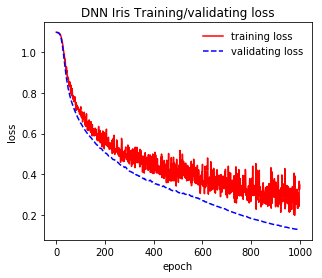

In [14]:
#----------------------------------------
# Summarize history for loss.

plt.ion()

plt.figure('DNN Iris loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('DNN Iris Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)


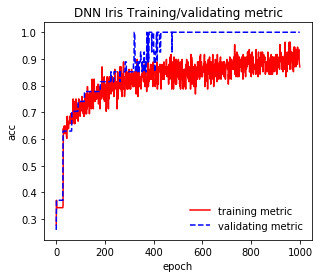

In [15]:
#----------------------------------------
# Summarize history for metric.

plt.figure('DNN Iris metric', figsize = (4.8, 4.0))
plt.plot(history.history['acc'], "r-")
plt.plot(history.history['val_acc'], "b--")
plt.title('DNN Iris Training/validating metric')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
